## Modelling

In [ ]:
# Importing Libraries
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, auc, confusion_matrix

###Machine Learning Models

#####Metric

Our Dataset is Slightly Unbalance and sparse.
We will use AUC as a Metrics along with Accuracy.

#####Some Functions for Modeling

In [ ]:
def print_scores(train, train_prob, val, val_prob):
  """This fuction is for printing Metrics Scores"""
  try:
    print(f'AUC for train data : {np.round(roc_auc_score(y_train, y_train_prob[:,1]),4)}')
    print(f'AUC for validation data : {np.round(roc_auc_score(y_val, y_val_prob[:,1]),4)}')
    print(f'Accuracy Value for train data : {np.round(accuracy_score(y_train, y_train_pred)*100,2)}%')
    print(f'Accuracy Value for validation data : {np.round(accuracy_score(y_val, y_val_pred)*100,2)}%')
    
  except:
    print(f'Train AUC           : {np.round(roc_auc_score(y_train, y_train_prob),4)}')
    print(f'Validation AUC      : {np.round(roc_auc_score(y_val, y_val_prob),4)}')
    print(f'Train Accuracy      : {np.round(accuracy_score(y_train, y_train_pred)*100,2)}%')
    print(f'Valdiation Accuracy : {np.round(accuracy_score(y_val, y_val_pred)*100,2)}%')


In [ ]:
def plot_roc_curve(train, train_prob, val, val_prob):
  """This function is to plot ROC Curve"""
  try:
    train_fpr, train_tpr, tr_thresholds = roc_curve(train, train_prob[:,1])
    test_fpr, test_tpr, te_thresholds = roc_curve(val, val_prob[:,1])
    print(f'AUC for train data : {np.round(roc_auc_score(train, train_prob[:,1]),4)}')
    print(f'AUC for validation data : {np.round(roc_auc_score(val, val_prob[:,1]),4)}')
 
  except:
    train_fpr, train_tpr, tr_thresholds = roc_curve(train, train_prob)
    test_fpr, test_tpr, te_thresholds = roc_curve(val, val_prob)
    print(f'AUC for train data : {np.round(roc_auc_score(train, train_prob),4)}')
    print(f'AUC for validation data : {np.round(roc_auc_score(val, val_prob),4)}')
  plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
  plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
  plt.legend()
  plt.xlabel("FPR") 
  plt.ylabel("TPR")
  plt.title("ROC Curve for Train and Test Data\n")
  plt.grid()
  plt.show()

In [ ]:
def plot_confusion_matrix(train_y, train_predict_y, test_y, test_predict_y):
    
    """This function is for ploting Confusion, Precison and Recall Matrix for Train and Validation data"""
    
    C = confusion_matrix(train_y, train_predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    
    C1 = confusion_matrix(test_y, test_predict_y)
    A1 =(((C1.T)/(C1.sum(axis=1))).T)
    B1 =(C1/C1.sum(axis=0))
    
    fig = plt.figure(figsize =(20,10))
    ax1 = fig.add_subplot(231)
    ax2 = fig.add_subplot(232)
    ax3 = fig.add_subplot(233)
    ax4 = fig.add_subplot(234)
    ax5 = fig.add_subplot(235)
    ax6 = fig.add_subplot(236)
    ax1.set_title("Confustion Matrix(Train)")
    ax2.set_title("Precision Matrix(Train)")
    ax3.set_title("Recall Matrix(Train)")
    ax4.set_title("Confustion Matrix(Val)")
    ax5.set_title("Precision Matrix(Val)")
    ax6.set_title("Recall Matrix(Val)")
    labels = [0,1]
    
    sns.heatmap(C, annot=True, ax=ax1, cmap=plt.cm.CMRmap_r, fmt=".3f", xticklabels=labels, yticklabels=labels)
    ax1.set_xlabel('Predicted Class')
    ax1.set_ylabel('Original Class')
    
    sns.heatmap(B, annot=True, ax=ax2, cmap=plt.cm.CMRmap_r, fmt=".3f", xticklabels=labels, yticklabels=labels)
    ax2.set_xlabel('Predicted Class')
    ax2.set_ylabel('Original Class')
    
    sns.heatmap(A, annot=True, ax=ax3, cmap=plt.cm.CMRmap_r, fmt=".3f", xticklabels=labels, yticklabels=labels)
    ax3.set_xlabel('Predicted Class')
    ax3.set_ylabel('Original Class')
    
    
    sns.heatmap(C1, annot=True, ax=ax4, cmap=plt.cm.CMRmap_r, fmt=".3f", xticklabels=labels, yticklabels=labels)
    ax4.set_xlabel('Predicted Class')
    ax4.set_ylabel('Original Class')
    
    sns.heatmap(B1, annot=True, ax=ax5, cmap=plt.cm.CMRmap_r, fmt=".3f", xticklabels=labels, yticklabels=labels)
    ax5.set_xlabel('Predicted Class')
    ax5.set_ylabel('Original Class')
    
    sns.heatmap(A1, annot=True, ax=ax6, cmap=plt.cm.CMRmap_r, fmt=".3f", xticklabels=labels, yticklabels=labels)
    ax6.set_xlabel('Predicted Class')
    ax6.set_ylabel('Original Class')
    
    plt.show()

#### Random Model

In [ ]:
y_train_prob = np.random.rand(len(X_train))
y_val_prob = np.random.rand(len(X_val))
y_train_pred = np.random.randint(low=0, high=2, size=len(X_train), dtype=int)
y_val_pred = np.random.randint(low=0, high=2, size=len(X_val), dtype=int)

In [ ]:
print_scores(y_train, y_train_prob, y_val, y_val_prob)

Train AUC           : 0.5016
Validation AUC      : 0.4999
Train Accuracy      : 50.67%
Valdiation Accuracy : 52.05%


AUC for train data : 0.5016
AUC for validation data : 0.4999


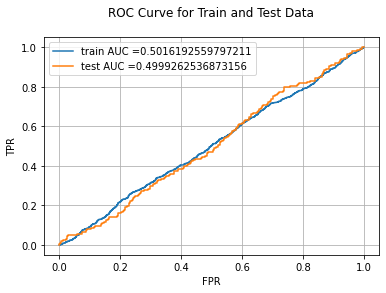

In [ ]:
plot_roc_curve(y_train, y_train_prob, y_val, y_val_prob)

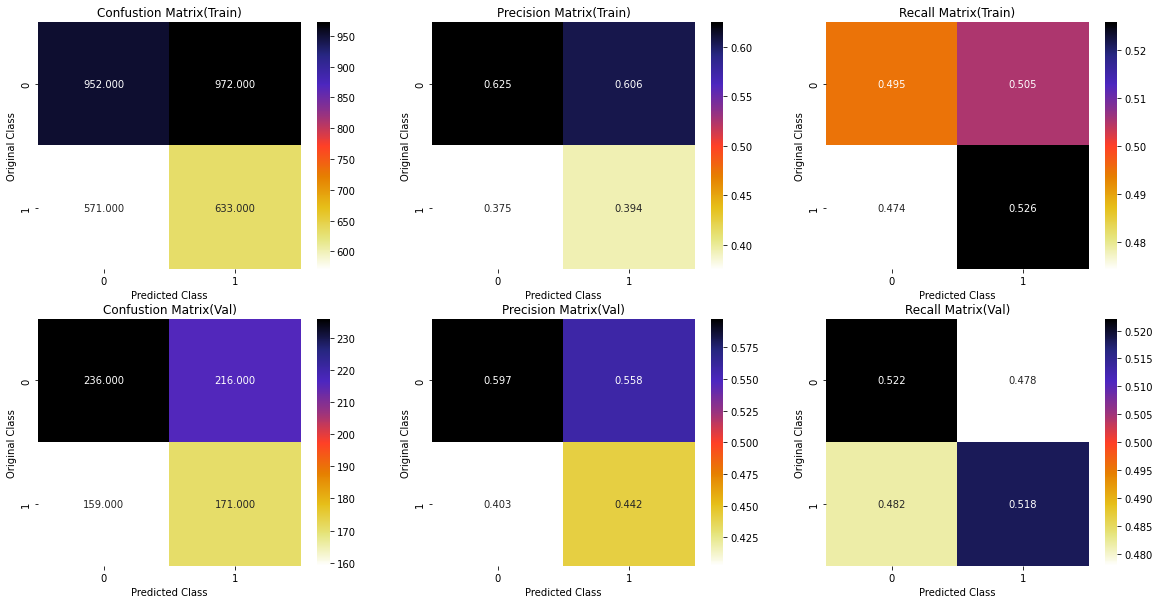

In [ ]:
plot_confusion_matrix(y_train, y_train_pred, y_val, y_val_pred)

The Random Model gives 0.5 AUC and 0.5 Accuracy.

####KNN

##### Using All features

  4%|▍         | 1/25 [00:00<00:09,  2.45it/s]


KNN is computed for K = 1


  8%|▊         | 2/25 [00:00<00:09,  2.33it/s]


KNN is computed for K = 3


 12%|█▏        | 3/25 [00:01<00:10,  2.11it/s]


KNN is computed for K = 5


 16%|█▌        | 4/25 [00:01<00:10,  2.02it/s]


KNN is computed for K = 7


 20%|██        | 5/25 [00:02<00:10,  1.97it/s]


KNN is computed for K = 9


 24%|██▍       | 6/25 [00:02<00:09,  1.94it/s]


KNN is computed for K = 11


 28%|██▊       | 7/25 [00:03<00:09,  1.93it/s]


KNN is computed for K = 13


 32%|███▏      | 8/25 [00:04<00:08,  1.92it/s]


KNN is computed for K = 15


 36%|███▌      | 9/25 [00:04<00:08,  1.92it/s]


KNN is computed for K = 17


 40%|████      | 10/25 [00:05<00:07,  1.91it/s]


KNN is computed for K = 19


 44%|████▍     | 11/25 [00:05<00:07,  1.91it/s]


KNN is computed for K = 21


 48%|████▊     | 12/25 [00:06<00:06,  1.90it/s]


KNN is computed for K = 23


 52%|█████▏    | 13/25 [00:06<00:06,  1.90it/s]


KNN is computed for K = 25


 56%|█████▌    | 14/25 [00:07<00:05,  1.90it/s]


KNN is computed for K = 27


 60%|██████    | 15/25 [00:07<00:05,  1.89it/s]


KNN is computed for K = 29


 64%|██████▍   | 16/25 [00:08<00:04,  1.88it/s]


KNN is computed for K = 31


 68%|██████▊   | 17/25 [00:08<00:04,  1.88it/s]


KNN is computed for K = 33


 72%|███████▏  | 18/25 [00:09<00:04,  1.74it/s]


KNN is computed for K = 35


 76%|███████▌  | 19/25 [00:10<00:03,  1.60it/s]


KNN is computed for K = 37


 80%|████████  | 20/25 [00:10<00:03,  1.48it/s]


KNN is computed for K = 39


 84%|████████▍ | 21/25 [00:11<00:02,  1.42it/s]


KNN is computed for K = 41


 88%|████████▊ | 22/25 [00:12<00:02,  1.40it/s]


KNN is computed for K = 43


 92%|█████████▏| 23/25 [00:13<00:01,  1.39it/s]


KNN is computed for K = 45


 96%|█████████▌| 24/25 [00:13<00:00,  1.37it/s]


KNN is computed for K = 47


100%|██████████| 25/25 [00:14<00:00,  1.69it/s]


KNN is computed for K = 49


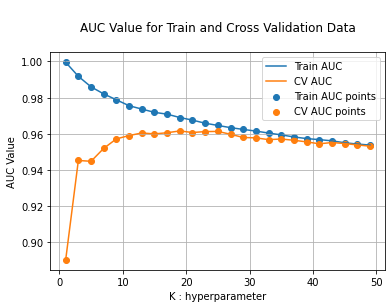

In [ ]:
from tqdm import tqdm 
from sklearn.metrics import roc_auc_score  
from sklearn.neighbors import KNeighborsClassifier 
from prettytable import PrettyTable
Pt = PrettyTable(["Model", "Data", "Train AUC", "Val AUC", "Train Accuracy", "Val Accuracy"])
train_auc = []
val_auc = []
K = range(1,50,2)
for i in tqdm(K):
  neigh = KNeighborsClassifier(n_neighbors=i, algorithm='brute', n_jobs=-1)
  neigh.fit(X_train, y_train)

  y_train_pred = neigh.predict_proba(X_train)    
  y_val_pred = neigh.predict_proba(X_val)
  print("\nKNN is computed for K = "+str(i))

  # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
  # not the predicted outputs        
  train_auc.append(roc_auc_score(y_train, y_train_pred[:,1]))
  val_auc.append(roc_auc_score(y_val, y_val_pred[:,1]))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, val_auc, label='CV AUC')
plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, val_auc, label='CV AUC points')
plt.legend()
plt.xlabel("K : hyperparameter")
plt.ylabel("AUC Value")
plt.title("\nAUC Value for Train and Cross Validation Data\n")
plt.grid()
plt.show()

In [ ]:
a = 0
for i in range(len(val_auc)):
  if(val_auc[i]> val_auc[a]):
    a = i
  best_k =2*a+1  #Since i have taken only odd k values
print("\nThe best value of k = ", best_k)


The best value of k =  19


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=best_k, algorithm='brute', n_jobs=-1)
neigh.fit(X_train, y_train)

y_train_pred = neigh.predict(X_train)
y_val_pred = neigh.predict(X_val)
y_train_prob = neigh.predict_proba(X_train)
y_val_prob = neigh.predict_proba(X_val)

print_scores(y_train, y_train_pred, y_val, y_val_pred)

Pt.add_row(["KNN", "All Features", 
            np.round(roc_auc_score(y_train, y_train_prob[:,1]),4), np.round(roc_auc_score(y_val, y_val_prob[:,1]),4), 
            np.round(accuracy_score(y_train, y_train_pred)*100,2), np.round(accuracy_score(y_val, y_val_pred)*100,2)])
print('='*50)

AUC for train data : 0.969
AUC for validation data : 0.9616
Accuracy Value for train data : 90.6%
Accuracy Value for validation data : 89.13%


AUC for train data : 0.969
AUC for validation data : 0.9616


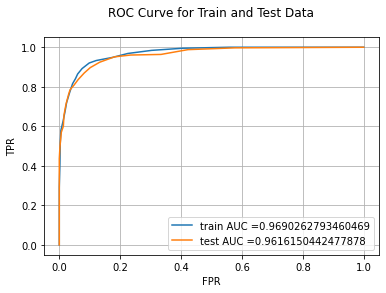

In [ ]:
plot_roc_curve(y_train, y_train_prob, y_val, y_val_prob)

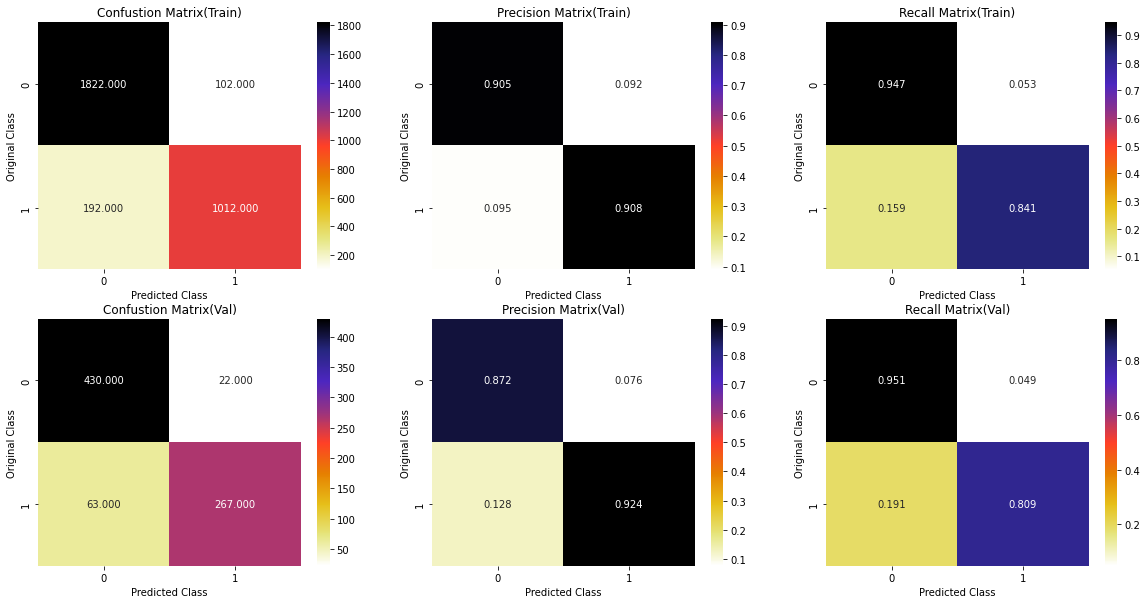

In [ ]:
plot_confusion_matrix(y_train, y_train_pred, y_val, y_val_pred)

##### Using Correation Matrix Features

  4%|▍         | 1/25 [00:00<00:11,  2.18it/s]


KNN is computed for K = 1


  8%|▊         | 2/25 [00:01<00:12,  1.90it/s]


KNN is computed for K = 3


 12%|█▏        | 3/25 [00:01<00:12,  1.81it/s]


KNN is computed for K = 5


 16%|█▌        | 4/25 [00:02<00:11,  1.76it/s]


KNN is computed for K = 7


 20%|██        | 5/25 [00:02<00:11,  1.75it/s]


KNN is computed for K = 9


 24%|██▍       | 6/25 [00:03<00:10,  1.81it/s]


KNN is computed for K = 11


 28%|██▊       | 7/25 [00:03<00:09,  1.87it/s]


KNN is computed for K = 13


 32%|███▏      | 8/25 [00:04<00:08,  1.89it/s]


KNN is computed for K = 15


 36%|███▌      | 9/25 [00:04<00:08,  1.91it/s]


KNN is computed for K = 17


 40%|████      | 10/25 [00:05<00:07,  1.93it/s]


KNN is computed for K = 19


 44%|████▍     | 11/25 [00:05<00:07,  1.94it/s]


KNN is computed for K = 21


 48%|████▊     | 12/25 [00:06<00:06,  1.94it/s]


KNN is computed for K = 23


 52%|█████▏    | 13/25 [00:06<00:06,  1.94it/s]


KNN is computed for K = 25


 56%|█████▌    | 14/25 [00:07<00:05,  1.94it/s]


KNN is computed for K = 27


 60%|██████    | 15/25 [00:07<00:05,  1.95it/s]


KNN is computed for K = 29


 64%|██████▍   | 16/25 [00:08<00:04,  1.94it/s]


KNN is computed for K = 31


 68%|██████▊   | 17/25 [00:08<00:04,  1.94it/s]


KNN is computed for K = 33


 72%|███████▏  | 18/25 [00:09<00:03,  1.93it/s]


KNN is computed for K = 35


 76%|███████▌  | 19/25 [00:09<00:03,  1.93it/s]


KNN is computed for K = 37


 80%|████████  | 20/25 [00:10<00:02,  1.92it/s]


KNN is computed for K = 39


 84%|████████▍ | 21/25 [00:11<00:02,  1.92it/s]


KNN is computed for K = 41


 88%|████████▊ | 22/25 [00:11<00:01,  1.90it/s]


KNN is computed for K = 43


 92%|█████████▏| 23/25 [00:12<00:01,  1.90it/s]


KNN is computed for K = 45


 96%|█████████▌| 24/25 [00:12<00:00,  1.91it/s]


KNN is computed for K = 47


100%|██████████| 25/25 [00:13<00:00,  1.90it/s]


KNN is computed for K = 49


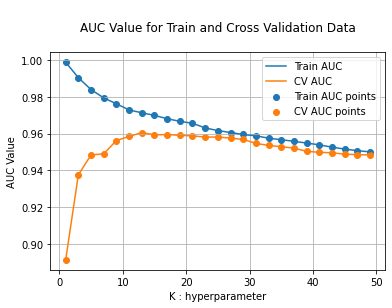

In [ ]:
train_auc=[]
val_auc = []
K = range(1,50,2)
for i in tqdm(K):
  neigh = KNeighborsClassifier(n_neighbors=i, algorithm='brute', n_jobs=-1)
  neigh.fit(X_train1, y_train)

  y_train_pred = neigh.predict_proba(X_train1)    
  y_val_pred = neigh.predict_proba(X_val1)
  print("\nKNN is computed for K = "+str(i))

  # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
  # not the predicted outputs        
  train_auc.append(roc_auc_score(y_train, y_train_pred[:,1]))
  val_auc.append(roc_auc_score(y_val, y_val_pred[:,1]))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, val_auc, label='CV AUC')
plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, val_auc, label='CV AUC points')
plt.legend()
plt.xlabel("K : hyperparameter")
plt.ylabel("AUC Value")
plt.title("\nAUC Value for Train and Cross Validation Data\n")
plt.grid()
plt.show()

In [ ]:
a = 0
for i in range(len(val_auc)):
  if(val_auc[i]> val_auc[a]):
    a = i
  best_k =2*a+1  #Since i have taken only odd k values
print("\nThe best value of k = ", best_k)


The best value of k =  13


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=best_k, algorithm='brute', n_jobs=-1)
neigh.fit(X_train1, y_train)

y_train_pred = neigh.predict(X_train1)
y_val_pred = neigh.predict(X_val1)
y_train_prob = neigh.predict_proba(X_train1)
y_val_prob = neigh.predict_proba(X_val1)

print_scores(y_train, y_train_pred, y_val, y_val_pred)


Pt.add_row(["KNN", "Correlation", 
            np.round(roc_auc_score(y_train, y_train_prob[:,1]),4), np.round(roc_auc_score(y_val, y_val_prob[:,1]),4), 
            np.round(accuracy_score(y_train, y_train_pred)*100,2), np.round(accuracy_score(y_val, y_val_pred)*100,2)])
print('='*50)

AUC for train data : 0.9713
AUC for validation data : 0.9605
Accuracy Value for train data : 91.02%
Accuracy Value for validation data : 89.51%


AUC for train data : 0.9713
AUC for validation data : 0.9605


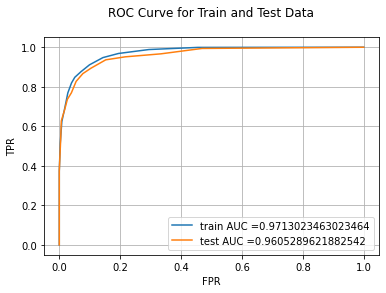

In [ ]:
plot_roc_curve(y_train, y_train_prob, y_val, y_val_prob)

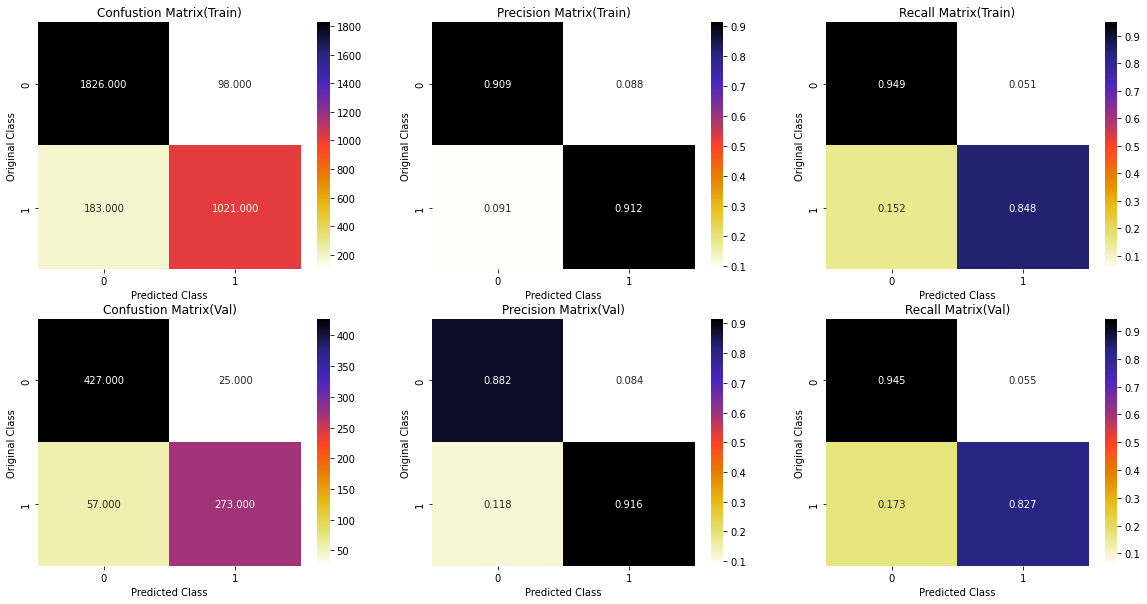

In [ ]:
plot_confusion_matrix(y_train, y_train_pred, y_val, y_val_pred)

##### Using Mutual Information Featues

  4%|▍         | 1/25 [00:00<00:09,  2.46it/s]


KNN is computed for K = 1


  8%|▊         | 2/25 [00:00<00:09,  2.34it/s]


KNN is computed for K = 3


 12%|█▏        | 3/25 [00:01<00:10,  2.14it/s]


KNN is computed for K = 5


 16%|█▌        | 4/25 [00:01<00:10,  2.06it/s]


KNN is computed for K = 7


 20%|██        | 5/25 [00:02<00:09,  2.02it/s]


KNN is computed for K = 9


 24%|██▍       | 6/25 [00:02<00:09,  2.00it/s]


KNN is computed for K = 11


 28%|██▊       | 7/25 [00:03<00:09,  1.98it/s]


KNN is computed for K = 13


 32%|███▏      | 8/25 [00:03<00:08,  1.97it/s]


KNN is computed for K = 15


 36%|███▌      | 9/25 [00:04<00:08,  1.96it/s]


KNN is computed for K = 17


 40%|████      | 10/25 [00:04<00:07,  1.96it/s]


KNN is computed for K = 19


 44%|████▍     | 11/25 [00:05<00:07,  1.95it/s]


KNN is computed for K = 21


 48%|████▊     | 12/25 [00:05<00:06,  1.95it/s]


KNN is computed for K = 23


 52%|█████▏    | 13/25 [00:06<00:06,  1.94it/s]


KNN is computed for K = 25


 56%|█████▌    | 14/25 [00:07<00:05,  1.94it/s]


KNN is computed for K = 27


 60%|██████    | 15/25 [00:07<00:05,  1.94it/s]


KNN is computed for K = 29


 64%|██████▍   | 16/25 [00:08<00:04,  1.93it/s]


KNN is computed for K = 31


 68%|██████▊   | 17/25 [00:08<00:04,  1.93it/s]


KNN is computed for K = 33


 72%|███████▏  | 18/25 [00:09<00:03,  1.91it/s]


KNN is computed for K = 35


 76%|███████▌  | 19/25 [00:09<00:03,  1.90it/s]


KNN is computed for K = 37


 80%|████████  | 20/25 [00:10<00:02,  1.89it/s]


KNN is computed for K = 39


 84%|████████▍ | 21/25 [00:10<00:02,  1.89it/s]


KNN is computed for K = 41


 88%|████████▊ | 22/25 [00:11<00:01,  1.88it/s]


KNN is computed for K = 43


 92%|█████████▏| 23/25 [00:11<00:01,  1.86it/s]


KNN is computed for K = 45


 96%|█████████▌| 24/25 [00:12<00:00,  1.86it/s]


KNN is computed for K = 47


100%|██████████| 25/25 [00:12<00:00,  1.94it/s]


KNN is computed for K = 49


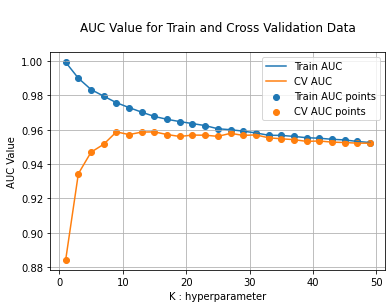

In [ ]:
train_auc = []
val_auc = []
K = range(1,50,2)
for i in tqdm(K):
  neigh = KNeighborsClassifier(n_neighbors=i, algorithm='brute', n_jobs=-1)
  neigh.fit(X_train2, y_train)

  y_train_pred = neigh.predict_proba(X_train2)    
  y_val_pred = neigh.predict_proba(X_val2)
  print("\nKNN is computed for K = "+str(i))

  # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
  # not the predicted outputs        
  train_auc.append(roc_auc_score(y_train, y_train_pred[:,1]))
  val_auc.append(roc_auc_score(y_val, y_val_pred[:,1]))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, val_auc, label='CV AUC')
plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, val_auc, label='CV AUC points')
plt.legend()
plt.xlabel("K : hyperparameter")
plt.ylabel("AUC Value")
plt.title("\nAUC Value for Train and Cross Validation Data\n")
plt.grid()
plt.show()

In [ ]:
a = 0
for i in range(len(val_auc)):
  if(val_auc[i]> val_auc[a]):
    a = i
  best_k =2*a+1  #Since i have taken only odd k values
print("\nThe best value of k = ", best_k)


The best value of k =  9


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=best_k, algorithm='brute', n_jobs=-1)
neigh.fit(X_train2, y_train)
y_train_pred = neigh.predict(X_train2)
y_val_pred = neigh.predict(X_val2)
y_train_prob = neigh.predict_proba(X_train2)
y_val_prob = neigh.predict_proba(X_val2)
print_scores(y_train, y_train_pred, y_val, y_val_pred)
Pt.add_row(["KNN", "Mutual Information", np.round(roc_auc_score(y_train, y_train_prob[:,1]),4), np.round(roc_auc_score(y_val, y_val_prob[:,1]),4), np.round(accuracy_score(y_train, y_train_pred)*100,2), np.round(accuracy_score(y_val, y_val_pred)*100,2)])
print('='*50)

AUC for train data : 0.9758
AUC for validation data : 0.9588
Accuracy Value for train data : 91.4%
Accuracy Value for validation data : 89.0%


AUC for train data : 0.9758
AUC for validation data : 0.9588


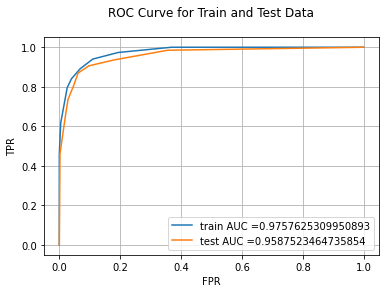

In [ ]:
plot_roc_curve(y_train, y_train_prob, y_val, y_val_prob)

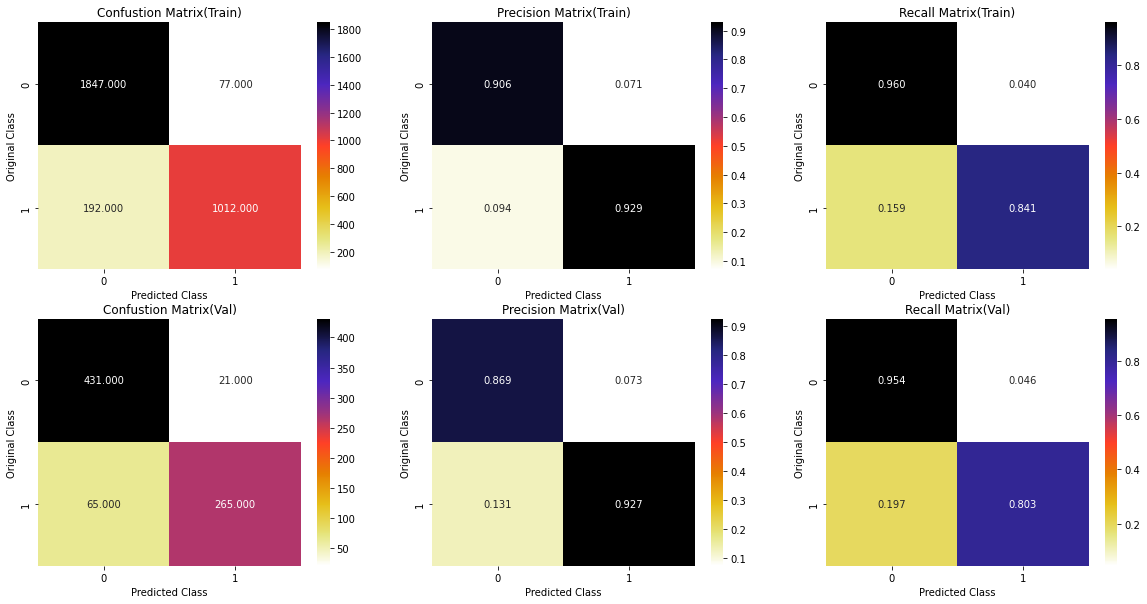

In [ ]:
plot_confusion_matrix(y_train, y_train_pred, y_val, y_val_pred)

##### Using Random Forest Features

  4%|▍         | 1/25 [00:00<00:09,  2.48it/s]


KNN is computed for K = 1


  8%|▊         | 2/25 [00:00<00:09,  2.33it/s]


KNN is computed for K = 3


 12%|█▏        | 3/25 [00:01<00:10,  2.16it/s]


KNN is computed for K = 5


 16%|█▌        | 4/25 [00:01<00:10,  2.08it/s]


KNN is computed for K = 7


 20%|██        | 5/25 [00:02<00:09,  2.03it/s]


KNN is computed for K = 9


 24%|██▍       | 6/25 [00:02<00:09,  2.01it/s]


KNN is computed for K = 11


 28%|██▊       | 7/25 [00:03<00:09,  1.99it/s]


KNN is computed for K = 13


 32%|███▏      | 8/25 [00:03<00:08,  1.98it/s]


KNN is computed for K = 15


 36%|███▌      | 9/25 [00:04<00:08,  1.94it/s]


KNN is computed for K = 17


 40%|████      | 10/25 [00:04<00:07,  1.94it/s]


KNN is computed for K = 19


 44%|████▍     | 11/25 [00:05<00:07,  1.95it/s]


KNN is computed for K = 21


 48%|████▊     | 12/25 [00:05<00:06,  1.96it/s]


KNN is computed for K = 23


 52%|█████▏    | 13/25 [00:06<00:06,  1.96it/s]


KNN is computed for K = 25


 56%|█████▌    | 14/25 [00:06<00:05,  1.96it/s]


KNN is computed for K = 27


 60%|██████    | 15/25 [00:07<00:05,  1.95it/s]


KNN is computed for K = 29


 64%|██████▍   | 16/25 [00:08<00:04,  1.94it/s]


KNN is computed for K = 31


 68%|██████▊   | 17/25 [00:08<00:04,  1.93it/s]


KNN is computed for K = 33


 72%|███████▏  | 18/25 [00:09<00:03,  1.93it/s]


KNN is computed for K = 35


 76%|███████▌  | 19/25 [00:09<00:03,  1.94it/s]


KNN is computed for K = 37


 80%|████████  | 20/25 [00:10<00:02,  1.92it/s]


KNN is computed for K = 39


 84%|████████▍ | 21/25 [00:10<00:02,  1.91it/s]


KNN is computed for K = 41


 88%|████████▊ | 22/25 [00:11<00:01,  1.91it/s]


KNN is computed for K = 43


 92%|█████████▏| 23/25 [00:11<00:01,  1.90it/s]


KNN is computed for K = 45


 96%|█████████▌| 24/25 [00:12<00:00,  1.90it/s]


KNN is computed for K = 47


100%|██████████| 25/25 [00:12<00:00,  1.96it/s]


KNN is computed for K = 49


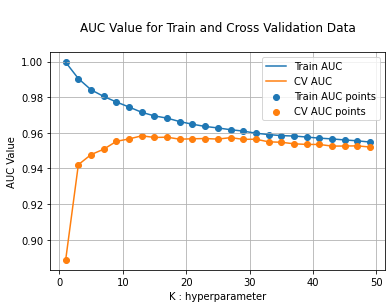

In [ ]:
train_auc = []
val_auc = []
K = range(1,50,2)
for i in tqdm(K):
  neigh = KNeighborsClassifier(n_neighbors=i, algorithm='brute', n_jobs=-1)
  neigh.fit(X_train3, y_train)

  y_train_pred = neigh.predict_proba(X_train3)    
  y_val_pred = neigh.predict_proba(X_val3)
  print("\nKNN is computed for K = "+str(i))

  # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
  # not the predicted outputs        
  train_auc.append(roc_auc_score(y_train, y_train_pred[:,1]))
  val_auc.append(roc_auc_score(y_val, y_val_pred[:,1]))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, val_auc, label='CV AUC')
plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, val_auc, label='CV AUC points')
plt.legend()
plt.xlabel("K : hyperparameter")
plt.ylabel("AUC Value")
plt.title("\nAUC Value for Train and Cross Validation Data\n")
plt.grid()
plt.show()

In [ ]:
a = 0
for i in range(len(val_auc)):
  if(val_auc[i]> val_auc[a]):
    a = i
  best_k =2*a+1  #Since i have taken only odd k values
print("\nThe best value of k = ", best_k)


The best value of k =  13


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=best_k, algorithm='brute', n_jobs=-1)
neigh.fit(X_train3, y_train)

y_train_pred = neigh.predict(X_train3)
y_val_pred = neigh.predict(X_val3)
y_train_prob = neigh.predict_proba(X_train3)
y_val_prob = neigh.predict_proba(X_val3)

print_scores(y_train, y_train_pred, y_val, y_val_pred)

Pt.add_row(["KNN", "Random Forest", 
            np.round(roc_auc_score(y_train, y_train_prob[:,1]),4), np.round(roc_auc_score(y_val, y_val_prob[:,1]),4), 
            np.round(accuracy_score(y_train, y_train_pred)*100,2), np.round(accuracy_score(y_val, y_val_pred)*100,2)])
print('='*50)

AUC for train data : 0.9715
AUC for validation data : 0.9583
Accuracy Value for train data : 91.08%
Accuracy Value for validation data : 89.0%


AUC for train data : 0.9715
AUC for validation data : 0.9583


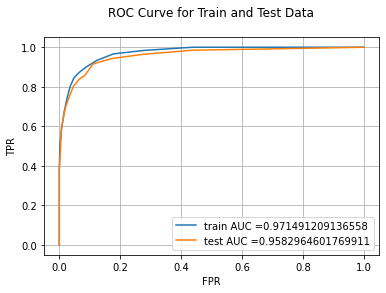

In [ ]:
plot_roc_curve(y_train, y_train_prob, y_val, y_val_prob)

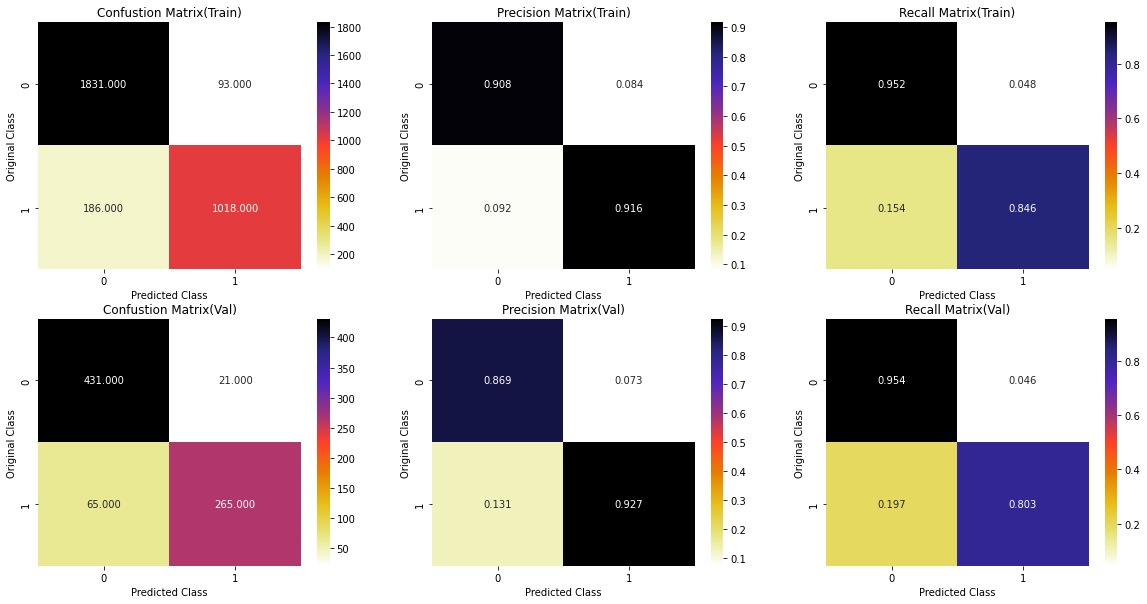

In [ ]:
plot_confusion_matrix(y_train, y_train_pred, y_val, y_val_pred)

###Logistic Regression

##### Using All features

 55%|█████▍    | 6/11 [00:00<00:00, 27.35it/s]

Linear Regression is computed for alpha = 1e-05
Linear Regression is computed for alpha = 0.0001
Linear Regression is computed for alpha = 0.001
Linear Regression is computed for alpha = 0.01
Linear Regression is computed for alpha = 0.1
Linear Regression is computed for alpha = 1


100%|██████████| 11/11 [00:00<00:00, 34.68it/s]


Linear Regression is computed for alpha = 10
Linear Regression is computed for alpha = 100
Linear Regression is computed for alpha = 1000
Linear Regression is computed for alpha = 10000
Linear Regression is computed for alpha = 100000


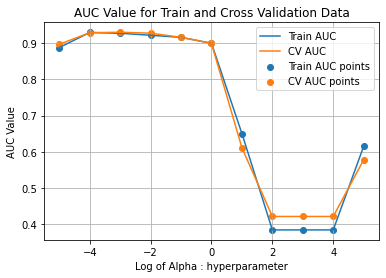

The best value of alpha = {} 0.001


In [ ]:
from sklearn.linear_model import SGDClassifier
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import numpy as np

train_auc = []
cv_auc = []
K = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
for i in tqdm(K):
    clf = SGDClassifier(loss='log', alpha=i, class_weight="balanced")
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)    
    y_val_pred = clf.predict(X_val)
    print("Linear Regression is computed for alpha = "+str(i))
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(accuracy_score(y_train, y_train_pred))
    cv_auc.append(accuracy_score(y_val, y_val_pred))


from matplotlib import pyplot as plt
plt.plot(np.log10(K), train_auc, label='Train AUC')
plt.plot(np.log10(K), cv_auc, label='CV AUC')
plt.scatter(np.log10(K), train_auc, label='Train AUC points')
plt.scatter(np.log10(K), cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Log of Alpha : hyperparameter")
plt.ylabel("AUC Value")
plt.title("AUC Value for Train and Cross Validation Data")
plt.grid()
plt.show()
print("The best value of alpha = {}", K[np.argmax(cv_auc)])

In [ ]:
clf = SGDClassifier(loss='log', alpha=K[np.argmax(cv_auc)], class_weight="balanced")
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)
y_train_prob = clf.predict_proba(X_train)
y_val_prob = clf.predict_proba(X_val)

print_scores(y_train, y_train_pred, y_val, y_val_pred)

Pt.add_row(["Logistic Regression", "All Features", 
            np.round(roc_auc_score(y_train, y_train_prob[:,1]),4), np.round(roc_auc_score(y_val, y_val_prob[:,1]),4), 
            np.round(accuracy_score(y_train, y_train_pred)*100,2), np.round(accuracy_score(y_val, y_val_pred)*100,2)])
print('='*50)

AUC for train data : 0.9724
AUC for validation data : 0.9745
Accuracy Value for train data : 92.55%
Accuracy Value for validation data : 92.71%


AUC for train data : 0.9724
AUC for validation data : 0.9745


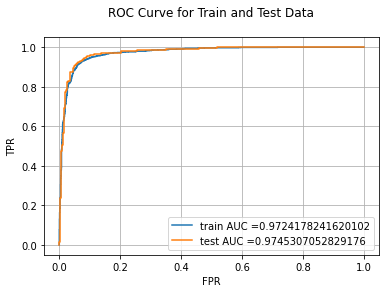

In [ ]:
plot_roc_curve(y_train, y_train_prob, y_val, y_val_prob)

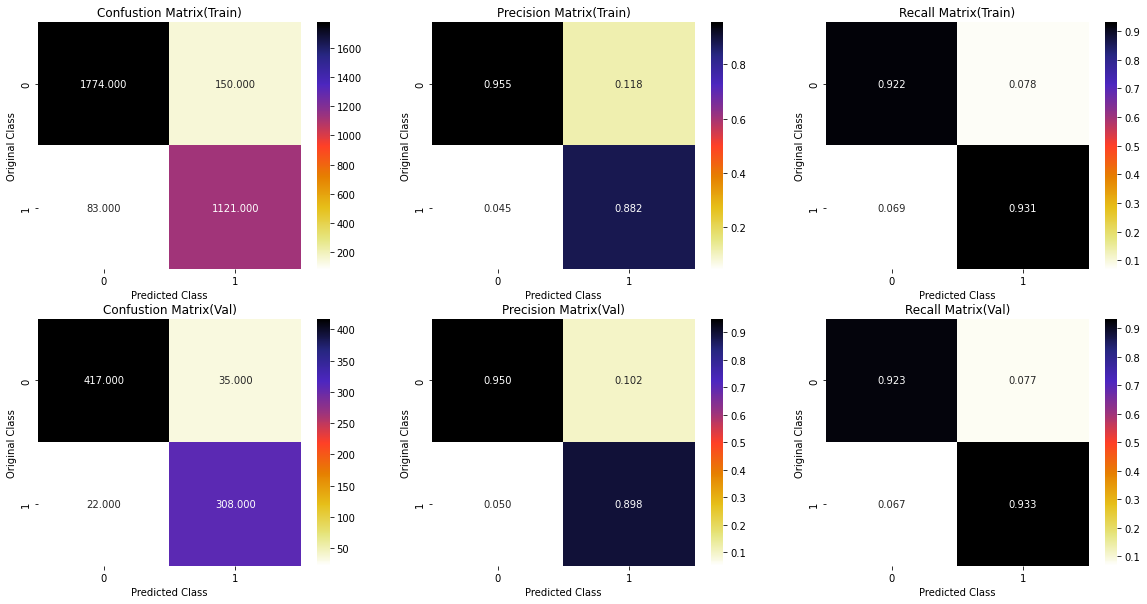

In [ ]:
plot_confusion_matrix(y_train, y_train_pred, y_val, y_val_pred)

##### Using Correation Matrix Features

 82%|████████▏ | 9/11 [00:00<00:00, 41.88it/s]

Linear Regression is computed for alpha = 1e-05
Linear Regression is computed for alpha = 0.0001
Linear Regression is computed for alpha = 0.001
Linear Regression is computed for alpha = 0.01
Linear Regression is computed for alpha = 0.1
Linear Regression is computed for alpha = 1
Linear Regression is computed for alpha = 10
Linear Regression is computed for alpha = 100
Linear Regression is computed for alpha = 1000
Linear Regression is computed for alpha = 10000


100%|██████████| 11/11 [00:00<00:00, 40.75it/s]


Linear Regression is computed for alpha = 100000


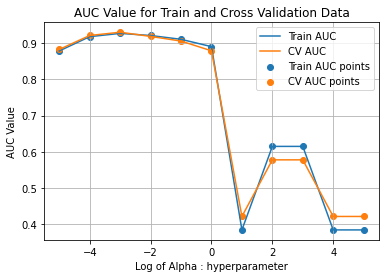

The best value of alpha = {} 0.001


In [ ]:
train_auc = []
cv_auc = []
K = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
for i in tqdm(K):
    clf = SGDClassifier(loss='log', alpha=i, class_weight="balanced")
    clf.fit(X_train1, y_train)
    y_train_pred = clf.predict(X_train1)    
    y_val_pred = clf.predict(X_val1)
    print("Linear Regression is computed for alpha = "+str(i))
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(accuracy_score(y_train, y_train_pred))
    cv_auc.append(accuracy_score(y_val, y_val_pred))


from matplotlib import pyplot as plt
plt.plot(np.log10(K), train_auc, label='Train AUC')
plt.plot(np.log10(K), cv_auc, label='CV AUC')
plt.scatter(np.log10(K), train_auc, label='Train AUC points')
plt.scatter(np.log10(K), cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Log of Alpha : hyperparameter")
plt.ylabel("AUC Value")
plt.title("AUC Value for Train and Cross Validation Data")
plt.grid()
plt.show()
print("The best value of alpha = {}", K[np.argmax(cv_auc)])

In [ ]:
clf = SGDClassifier(loss='log', alpha=K[np.argmax(cv_auc)], class_weight="balanced")
clf.fit(X_train1, y_train)

y_train_pred = clf.predict(X_train1)
y_val_pred = clf.predict(X_val1)
y_train_prob = clf.predict_proba(X_train1)
y_val_prob = clf.predict_proba(X_val1)

print_scores(y_train, y_train_pred, y_val, y_val_pred)

Pt.add_row(["Logistic Regression", "Correlation", 
            np.round(roc_auc_score(y_train, y_train_prob[:,1]),4), np.round(roc_auc_score(y_val, y_val_prob[:,1]),4),
            np.round(accuracy_score(y_train, y_train_pred)*100,2), np.round(accuracy_score(y_val, y_val_pred)*100,2)])

print('='*50)

AUC for train data : 0.9727
AUC for validation data : 0.9774
Accuracy Value for train data : 92.68%
Accuracy Value for validation data : 93.09%


AUC for train data : 0.9727
AUC for validation data : 0.9774


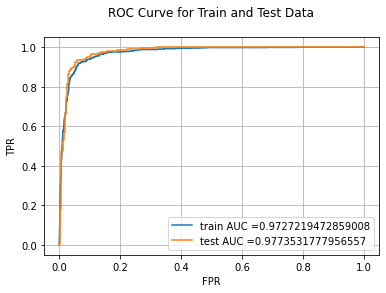

In [ ]:
plot_roc_curve(y_train, y_train_prob, y_val, y_val_prob)

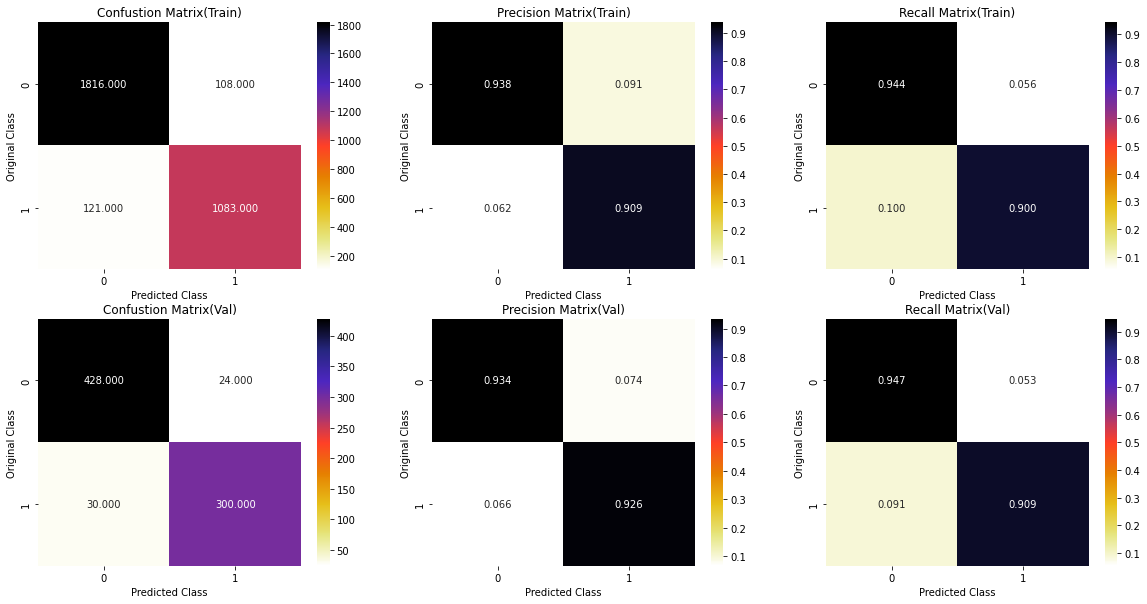

In [ ]:
plot_confusion_matrix(y_train, y_train_pred, y_val, y_val_pred)

##### Using Mutual Information Featues

 55%|█████▍    | 6/11 [00:00<00:00, 27.41it/s]

Linear Regression is computed for alpha = 1e-05
Linear Regression is computed for alpha = 0.0001
Linear Regression is computed for alpha = 0.001
Linear Regression is computed for alpha = 0.01
Linear Regression is computed for alpha = 0.1
Linear Regression is computed for alpha = 1
Linear Regression is computed for alpha = 10
Linear Regression is computed for alpha = 100


100%|██████████| 11/11 [00:00<00:00, 35.31it/s]


Linear Regression is computed for alpha = 1000
Linear Regression is computed for alpha = 10000
Linear Regression is computed for alpha = 100000


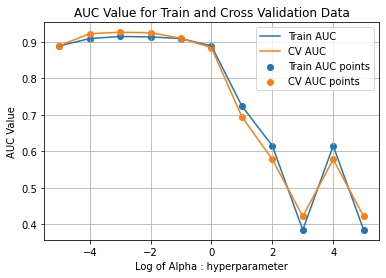

The best value of alpha = {} 0.001


In [ ]:
train_auc = []
cv_auc = []
K = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
for i in tqdm(K):
    clf = SGDClassifier(loss='log', alpha=i, class_weight="balanced")
    clf.fit(X_train2, y_train)
    y_train_pred = clf.predict(X_train2)    
    y_val_pred = clf.predict(X_val2)
    print("Linear Regression is computed for alpha = "+str(i))
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(accuracy_score(y_train, y_train_pred))
    cv_auc.append(accuracy_score(y_val, y_val_pred))


from matplotlib import pyplot as plt
plt.plot(np.log10(K), train_auc, label='Train AUC')
plt.plot(np.log10(K), cv_auc, label='CV AUC')
plt.scatter(np.log10(K), train_auc, label='Train AUC points')
plt.scatter(np.log10(K), cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Log of Alpha : hyperparameter")
plt.ylabel("AUC Value")
plt.title("AUC Value for Train and Cross Validation Data")
plt.grid()
plt.show()
print("The best value of alpha = {}", K[np.argmax(cv_auc)])

In [ ]:
clf = SGDClassifier(loss='log', alpha=K[np.argmax(cv_auc)], class_weight="balanced")
clf.fit(X_train2, y_train)

y_train_pred = clf.predict(X_train2)
y_val_pred = clf.predict(X_val2)
y_train_prob = clf.predict_proba(X_train2)
y_val_prob = clf.predict_proba(X_val2)

print_scores(y_train, y_train_pred, y_val, y_val_pred)

Pt.add_row(["Logistic Regression", "Mutual Information", 
            np.round(roc_auc_score(y_train, y_train_prob[:,1]),4), np.round(roc_auc_score(y_val, y_val_prob[:,1]),4),
            np.round(accuracy_score(y_train, y_train_pred)*100,2), np.round(accuracy_score(y_val, y_val_pred)*100,2)])
print('='*50)

AUC for train data : 0.9692
AUC for validation data : 0.9718
Accuracy Value for train data : 91.78%
Accuracy Value for validation data : 92.71%


AUC for train data : 0.9692
AUC for validation data : 0.9718


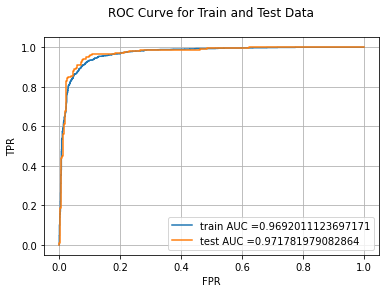

In [ ]:
plot_roc_curve(y_train, y_train_prob, y_val, y_val_prob)

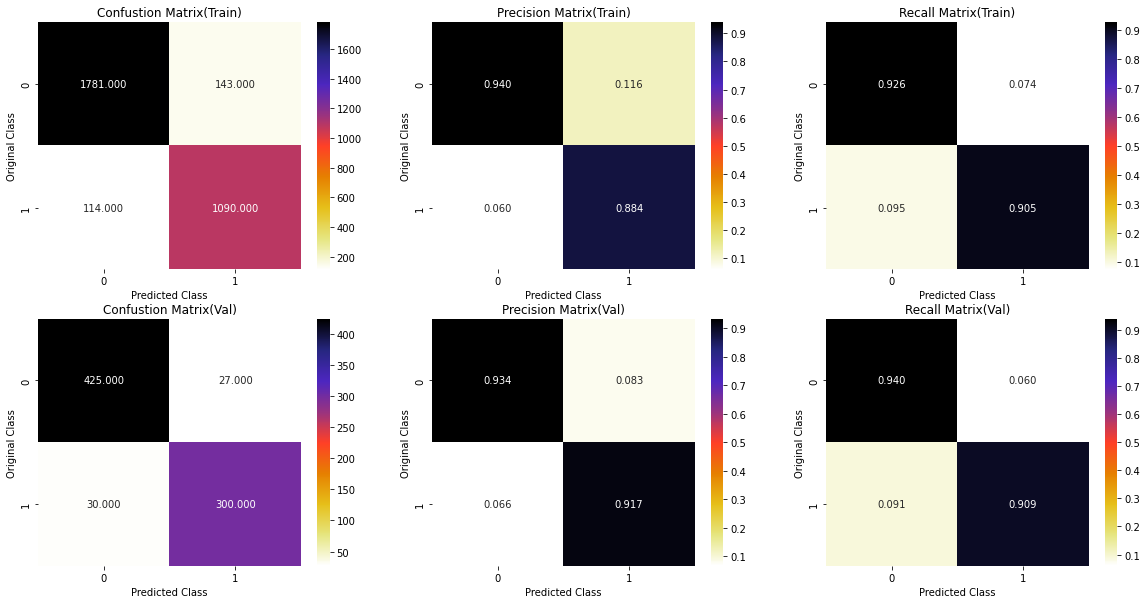

In [ ]:
plot_confusion_matrix(y_train, y_train_pred, y_val, y_val_pred)

##### Using Random Forest Features

 73%|███████▎  | 8/11 [00:00<00:00, 38.99it/s]

Linear Regression is computed for alpha = 1e-05
Linear Regression is computed for alpha = 0.0001
Linear Regression is computed for alpha = 0.001
Linear Regression is computed for alpha = 0.01
Linear Regression is computed for alpha = 0.1
Linear Regression is computed for alpha = 1
Linear Regression is computed for alpha = 10
Linear Regression is computed for alpha = 100
Linear Regression is computed for alpha = 1000


100%|██████████| 11/11 [00:00<00:00, 41.33it/s]


Linear Regression is computed for alpha = 10000
Linear Regression is computed for alpha = 100000


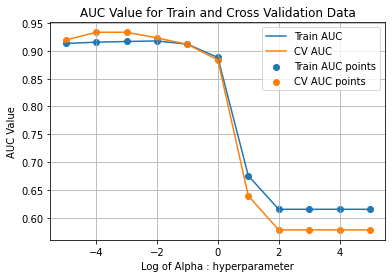

The best value of alpha = {} 0.0001


In [ ]:
train_auc = []
cv_auc = []
K = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
for i in tqdm(K):
    clf = SGDClassifier(loss='log', alpha=i, class_weight="balanced")
    clf.fit(X_train3, y_train)
    y_train_pred = clf.predict(X_train3)    
    y_val_pred = clf.predict(X_val3)
    print("Linear Regression is computed for alpha = "+str(i))
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(accuracy_score(y_train, y_train_pred))
    cv_auc.append(accuracy_score(y_val, y_val_pred))


from matplotlib import pyplot as plt
plt.plot(np.log10(K), train_auc, label='Train AUC')
plt.plot(np.log10(K), cv_auc, label='CV AUC')
plt.scatter(np.log10(K), train_auc, label='Train AUC points')
plt.scatter(np.log10(K), cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Log of Alpha : hyperparameter")
plt.ylabel("AUC Value")
plt.title("AUC Value for Train and Cross Validation Data")
plt.grid()
plt.show()
print("The best value of alpha = {}", K[np.argmax(cv_auc)])

In [ ]:
clf = SGDClassifier(loss='log', alpha=K[np.argmax(cv_auc)], class_weight="balanced")
clf.fit(X_train3, y_train)

y_train_pred = clf.predict(X_train3)
y_val_pred = clf.predict(X_val3)
y_train_prob = clf.predict_proba(X_train3)
y_val_prob = clf.predict_proba(X_val3)

print_scores(y_train, y_train_pred, y_val, y_val_pred)

Pt.add_row(["Logistic Regression", "Random Forest", 
            np.round(roc_auc_score(y_train, y_train_prob[:,1]),4), np.round(roc_auc_score(y_val, y_val_prob[:,1]),4), 
            np.round(accuracy_score(y_train, y_train_pred)*100,2), np.round(accuracy_score(y_val, y_val_pred)*100,2)])
print('='*50)

AUC for train data : 0.9625
AUC for validation data : 0.9665
Accuracy Value for train data : 91.34%
Accuracy Value for validation data : 92.2%


AUC for train data : 0.9625
AUC for validation data : 0.9665


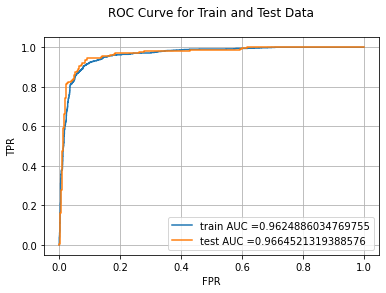

In [ ]:
plot_roc_curve(y_train, y_train_prob, y_val, y_val_prob)

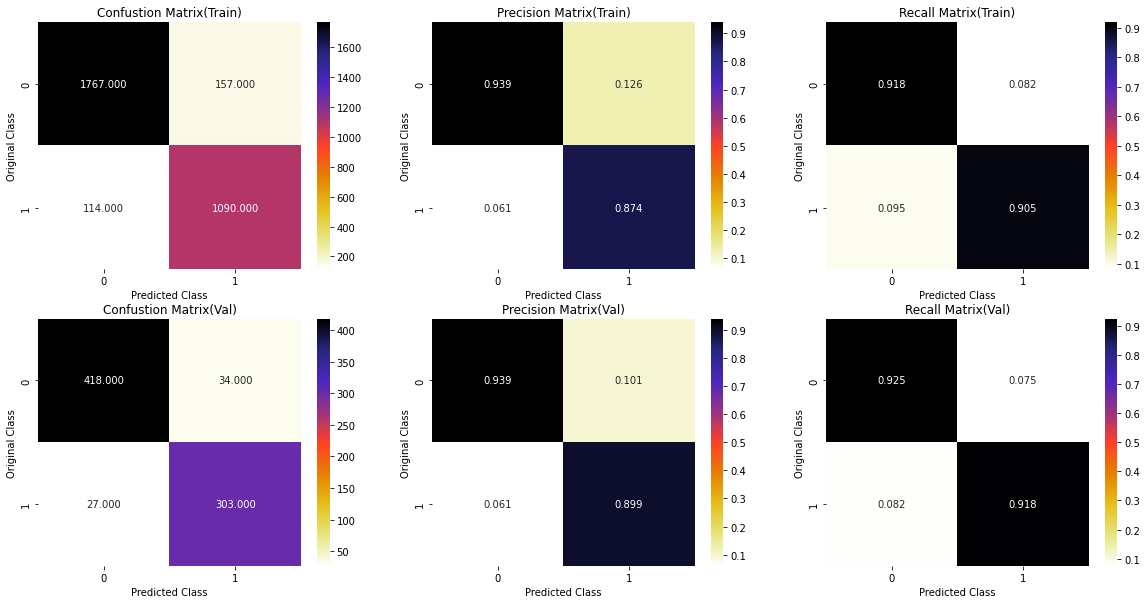

In [ ]:
plot_confusion_matrix(y_train, y_train_pred, y_val, y_val_pred)

###SVM

##### Using All features

100%|██████████| 11/11 [00:00<00:00, 47.39it/s]

Linear Regression is computed for alpha = 1e-05
Linear Regression is computed for alpha = 0.0001
Linear Regression is computed for alpha = 0.001
Linear Regression is computed for alpha = 0.01
Linear Regression is computed for alpha = 0.1
Linear Regression is computed for alpha = 1
Linear Regression is computed for alpha = 10
Linear Regression is computed for alpha = 100
Linear Regression is computed for alpha = 1000
Linear Regression is computed for alpha = 10000
Linear Regression is computed for alpha = 100000


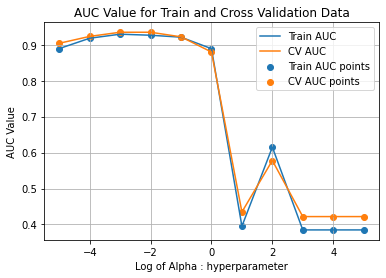

The best value of alpha =  0.001


In [ ]:
from sklearn.linear_model import SGDClassifier
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import numpy as np

train_auc = []
cv_auc = []
K = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
for i in tqdm(K):
    clf = SGDClassifier(loss='hinge', alpha=i, class_weight="balanced")
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)    
    y_val_pred = clf.predict(X_val)
    print("Linear Regression is computed for alpha = "+str(i))
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(accuracy_score(y_train, y_train_pred))
    cv_auc.append(accuracy_score(y_val, y_val_pred))


from matplotlib import pyplot as plt
plt.plot(np.log10(K), train_auc, label='Train AUC')
plt.plot(np.log10(K), cv_auc, label='CV AUC')
plt.scatter(np.log10(K), train_auc, label='Train AUC points')
plt.scatter(np.log10(K), cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Log of Alpha : hyperparameter")
plt.ylabel("AUC Value")
plt.title("AUC Value for Train and Cross Validation Data")
plt.grid()
plt.show()
print("The best value of alpha = ", K[np.argmax(cv_auc)])

In [ ]:
clf = SGDClassifier(loss='hinge', alpha=K[np.argmax(cv_auc)], class_weight="balanced")
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)
y_train_prob = clf.decision_function(X_train)
y_val_prob = clf.decision_function(X_val)

print_scores(y_train, y_train_pred, y_val, y_val_pred)

Pt.add_row(["SVM", "All Features",
            np.round(roc_auc_score(y_train, y_train_prob),4), np.round(roc_auc_score(y_val, y_val_prob),4), 
            np.round(accuracy_score(y_train, y_train_pred)*100,2), np.round(accuracy_score(y_val, y_val_pred)*100,2)])
print('='*50)

Train AUC           : 0.9719
Validation AUC      : 0.9756
Train Accuracy      : 92.87%
Valdiation Accuracy : 92.97%


AUC for train data : 0.9719
AUC for validation data : 0.9756


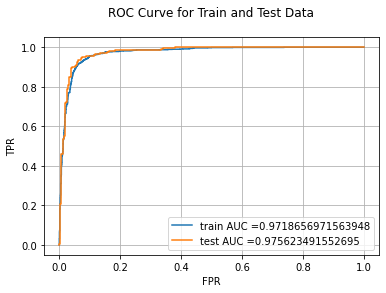

In [ ]:
plot_roc_curve(y_train, y_train_prob, y_val, y_val_prob)

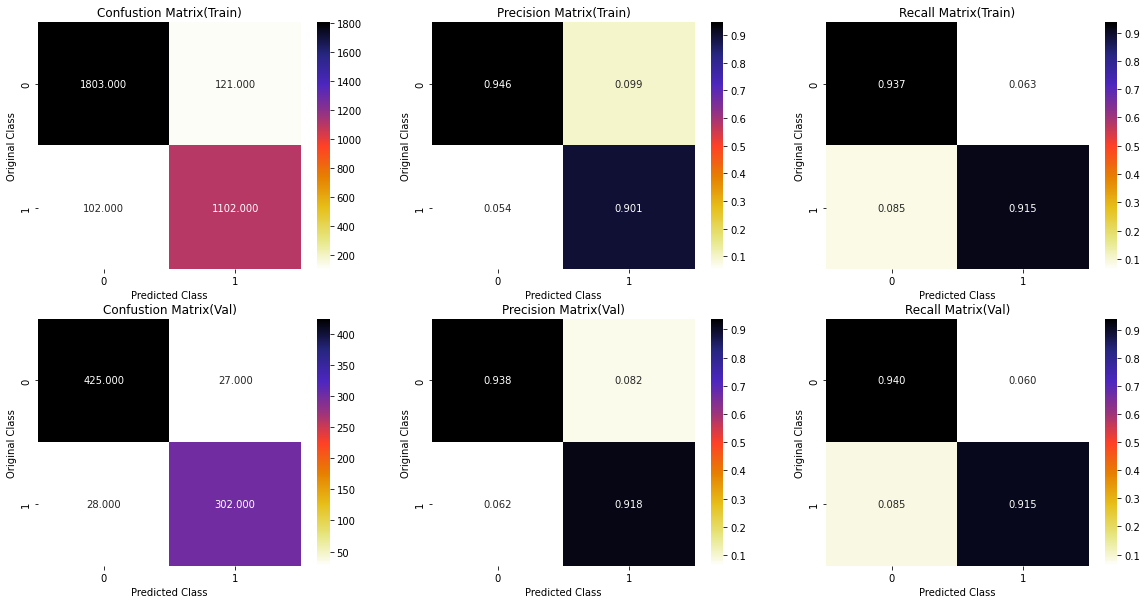

In [ ]:
plot_confusion_matrix(y_train, y_train_pred, y_val, y_val_pred)

##### Using Correation Matrix Features

 73%|███████▎  | 8/11 [00:00<00:00, 41.02it/s]

Linear Regression is computed for alpha = 1e-05
Linear Regression is computed for alpha = 0.0001
Linear Regression is computed for alpha = 0.001
Linear Regression is computed for alpha = 0.01
Linear Regression is computed for alpha = 0.1
Linear Regression is computed for alpha = 1
Linear Regression is computed for alpha = 10
Linear Regression is computed for alpha = 100
Linear Regression is computed for alpha = 1000
Linear Regression is computed for alpha = 10000


100%|██████████| 11/11 [00:00<00:00, 43.45it/s]


Linear Regression is computed for alpha = 100000


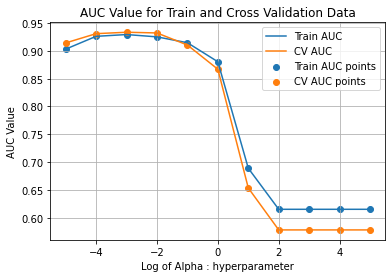

The best value of alpha =  0.001


In [ ]:
from sklearn.linear_model import SGDClassifier
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import numpy as np

train_auc = []
cv_auc = []
K = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
for i in tqdm(K):
    clf = SGDClassifier(loss='hinge', alpha=i, class_weight="balanced")
    clf.fit(X_train1, y_train)
    y_train_pred = clf.predict(X_train1)    
    y_val_pred = clf.predict(X_val1)
    print("Linear Regression is computed for alpha = "+str(i))
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(accuracy_score(y_train, y_train_pred))
    cv_auc.append(accuracy_score(y_val, y_val_pred))


from matplotlib import pyplot as plt
plt.plot(np.log10(K), train_auc, label='Train AUC')
plt.plot(np.log10(K), cv_auc, label='CV AUC')
plt.scatter(np.log10(K), train_auc, label='Train AUC points')
plt.scatter(np.log10(K), cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Log of Alpha : hyperparameter")
plt.ylabel("AUC Value")
plt.title("AUC Value for Train and Cross Validation Data")
plt.grid()
plt.show()
print("The best value of alpha = ", K[np.argmax(cv_auc)])

In [ ]:
clf = SGDClassifier(loss='hinge', alpha=K[np.argmax(cv_auc)], class_weight="balanced")
clf.fit(X_train1, y_train)

y_train_pred = clf.predict(X_train1)
y_val_pred = clf.predict(X_val1)
y_train_prob = clf.decision_function(X_train1)
y_val_prob = clf.decision_function(X_val1)

print_scores(y_train, y_train_pred, y_val, y_val_pred)

Pt.add_row(["SVM", "Correlation", 
            np.round(roc_auc_score(y_train, y_train_prob),4), np.round(roc_auc_score(y_val, y_val_prob),4),
            np.round(accuracy_score(y_train, y_train_pred)*100,2), np.round(accuracy_score(y_val, y_val_pred)*100,2)])
print('='*50)

Train AUC           : 0.9723
Validation AUC      : 0.9768
Train Accuracy      : 92.87%
Valdiation Accuracy : 93.99%


AUC for train data : 0.9723
AUC for validation data : 0.9768


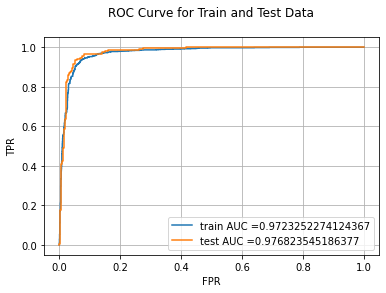

In [ ]:
plot_roc_curve(y_train, y_train_prob, y_val, y_val_prob)

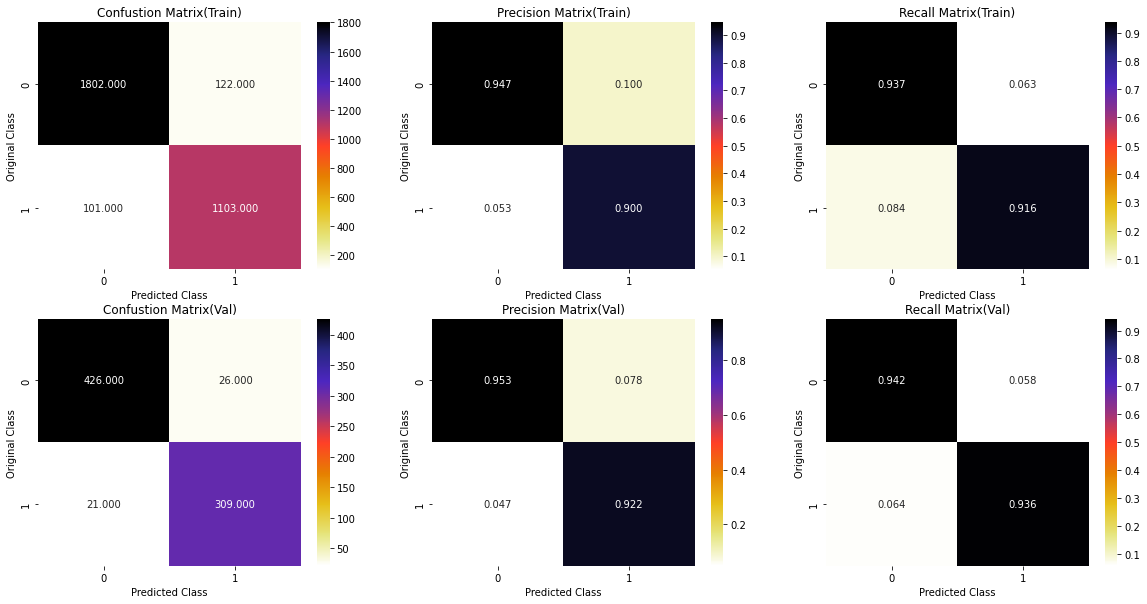

In [ ]:
plot_confusion_matrix(y_train, y_train_pred, y_val, y_val_pred)

##### Using Mutual Information Featues

100%|██████████| 11/11 [00:00<00:00, 54.40it/s]

Linear Regression is computed for alpha = 1e-05
Linear Regression is computed for alpha = 0.0001
Linear Regression is computed for alpha = 0.001
Linear Regression is computed for alpha = 0.01
Linear Regression is computed for alpha = 0.1
Linear Regression is computed for alpha = 1
Linear Regression is computed for alpha = 10
Linear Regression is computed for alpha = 100
Linear Regression is computed for alpha = 1000
Linear Regression is computed for alpha = 10000
Linear Regression is computed for alpha = 100000


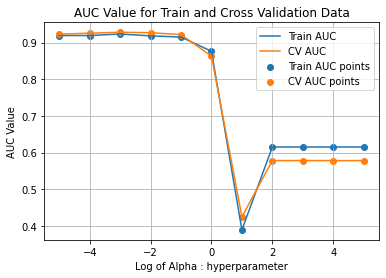

The best value of alpha =  0.001


In [ ]:
from sklearn.linear_model import SGDClassifier
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import numpy as np

train_auc = []
cv_auc = []
K = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
for i in tqdm(K):
    clf = SGDClassifier(loss='hinge', alpha=i, class_weight="balanced")
    clf.fit(X_train2, y_train)
    y_train_pred = clf.predict(X_train2)    
    y_val_pred = clf.predict(X_val2)
    print("Linear Regression is computed for alpha = "+str(i))
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(accuracy_score(y_train, y_train_pred))
    cv_auc.append(accuracy_score(y_val, y_val_pred))


from matplotlib import pyplot as plt
plt.plot(np.log10(K), train_auc, label='Train AUC')
plt.plot(np.log10(K), cv_auc, label='CV AUC')
plt.scatter(np.log10(K), train_auc, label='Train AUC points')
plt.scatter(np.log10(K), cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Log of Alpha : hyperparameter")
plt.ylabel("AUC Value")
plt.title("AUC Value for Train and Cross Validation Data")
plt.grid()
plt.show()
print("The best value of alpha = ", K[np.argmax(cv_auc)])

In [ ]:
clf = SGDClassifier(loss='hinge', alpha=K[np.argmax(cv_auc)], class_weight="balanced")
clf.fit(X_train2, y_train)

y_train_pred = clf.predict(X_train2)
y_val_pred = clf.predict(X_val2)
y_train_prob = clf.decision_function(X_train2)
y_val_prob = clf.decision_function(X_val2)

print_scores(y_train, y_train_pred, y_val, y_val_pred)

Pt.add_row(["SVM", "Mutual Information",
            np.round(roc_auc_score(y_train, y_train_prob),4), np.round(roc_auc_score(y_val, y_val_prob),4),
            np.round(accuracy_score(y_train, y_train_pred)*100,2), np.round(accuracy_score(y_val, y_val_pred)*100,2)])

print('='*50)

Train AUC           : 0.9687
Validation AUC      : 0.974
Train Accuracy      : 92.49%
Valdiation Accuracy : 93.48%


AUC for train data : 0.9687
AUC for validation data : 0.974


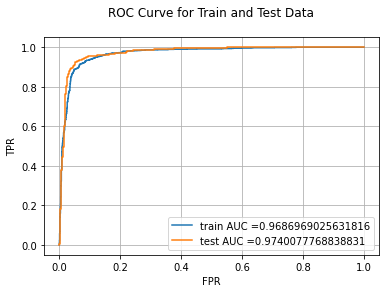

In [ ]:
plot_roc_curve(y_train, y_train_prob, y_val, y_val_prob)

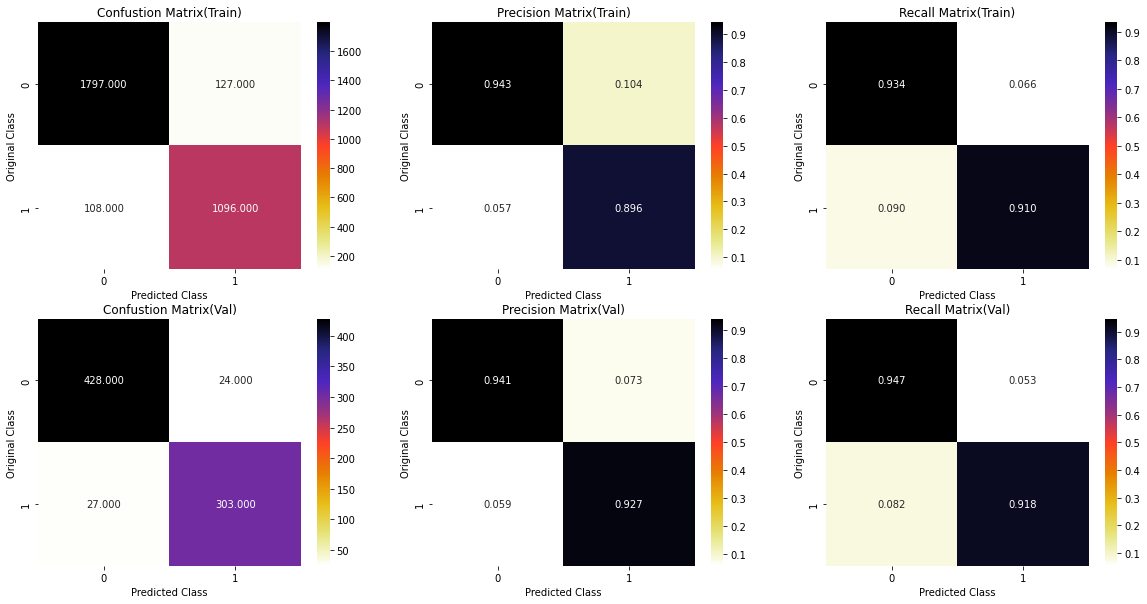

In [ ]:
plot_confusion_matrix(y_train, y_train_pred, y_val, y_val_pred)

##### Using Random Forest Features

100%|██████████| 11/11 [00:00<00:00, 62.44it/s]


Linear Regression is computed for alpha = 1e-05
Linear Regression is computed for alpha = 0.0001
Linear Regression is computed for alpha = 0.001
Linear Regression is computed for alpha = 0.01
Linear Regression is computed for alpha = 0.1
Linear Regression is computed for alpha = 1
Linear Regression is computed for alpha = 10
Linear Regression is computed for alpha = 100
Linear Regression is computed for alpha = 1000
Linear Regression is computed for alpha = 10000
Linear Regression is computed for alpha = 100000


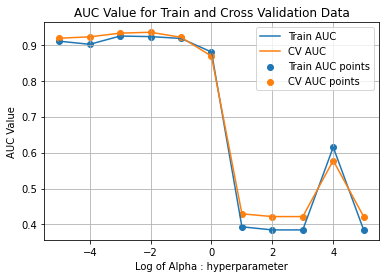

The best value of alpha =  0.01


In [ ]:
from sklearn.linear_model import SGDClassifier
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import numpy as np

train_auc = []
cv_auc = []
K = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
for i in tqdm(K):
    clf = SGDClassifier(loss='hinge', alpha=i, class_weight="balanced")
    clf.fit(X_train3, y_train)
    y_train_pred = clf.predict(X_train3)    
    y_val_pred = clf.predict(X_val3)
    print("Linear Regression is computed for alpha = "+str(i))
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(accuracy_score(y_train, y_train_pred))
    cv_auc.append(accuracy_score(y_val, y_val_pred))


from matplotlib import pyplot as plt
plt.plot(np.log10(K), train_auc, label='Train AUC')
plt.plot(np.log10(K), cv_auc, label='CV AUC')
plt.scatter(np.log10(K), train_auc, label='Train AUC points')
plt.scatter(np.log10(K), cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Log of Alpha : hyperparameter")
plt.ylabel("AUC Value")
plt.title("AUC Value for Train and Cross Validation Data")
plt.grid()
plt.show()
print("The best value of alpha = ", K[np.argmax(cv_auc)])

In [ ]:
clf = SGDClassifier(loss='hinge', alpha=K[np.argmax(cv_auc)], class_weight="balanced")
clf.fit(X_train3, y_train)

y_train_pred = clf.predict(X_train3)
y_val_pred = clf.predict(X_val3)
y_train_prob = clf.decision_function(X_train3)
y_val_prob = clf.decision_function(X_val3)

print_scores(y_train, y_train_pred, y_val, y_val_pred)

Pt.add_row(["SVM", "Random Forest",
            np.round(roc_auc_score(y_train, y_train_prob),4), np.round(roc_auc_score(y_val, y_val_prob),4),
            np.round(accuracy_score(y_train, y_train_pred)*100,2), np.round(accuracy_score(y_val, y_val_pred)*100,2)])

print('='*50)

Train AUC           : 0.9662
Validation AUC      : 0.9734
Train Accuracy      : 92.52%
Valdiation Accuracy : 93.61%


AUC for train data : 0.9662
AUC for validation data : 0.9734


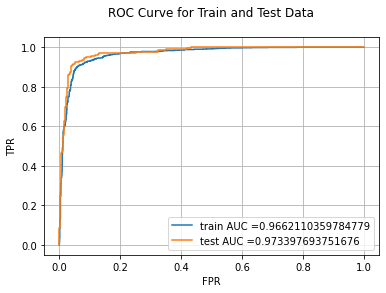

In [ ]:
plot_roc_curve(y_train, y_train_prob, y_val, y_val_prob)

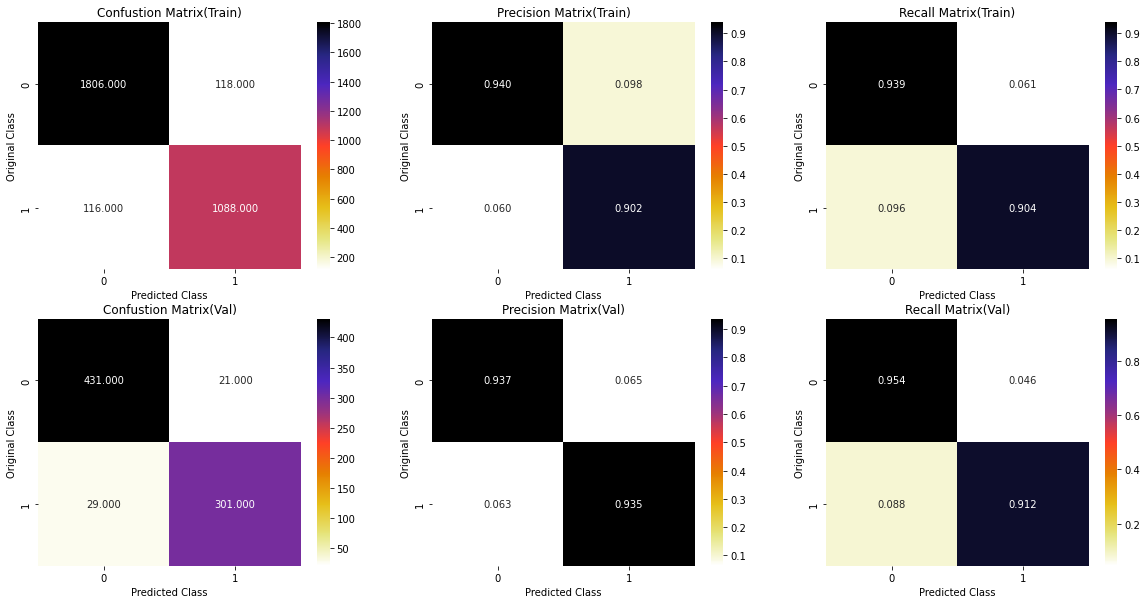

In [ ]:
plot_confusion_matrix(y_train, y_train_pred, y_val, y_val_pred)

### XGBoost

##### Using All features

In [ ]:
n_estimators = [5, 10, 50, 100, 200, 500,1000]
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]

from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
parameters = {'n_estimators' : n_estimators, 'max_depth' : max_depth }
est = xgb.sklearn.XGBClassifier(eval_metric= 'auc', objective='binary:logistic')
clf = RandomizedSearchCV(est, parameters, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1, return_train_score=True)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=XGBClassifier(eval_metric='auc'), n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [5, 10, 50, 100, 200,
                                                         500, 1000]},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
train_score = clf.cv_results_.get('mean_train_score')
test_score = clf.cv_results_.get('mean_test_score')
parameters = clf.cv_results_.get('params')
print('\t\tparameters\t\t', '   Train AUC\t\t', '   Test AUC\n')
for i in range(10):
    print(parameters[i],'\t',train_score[i],'\t', test_score[i])
    
print("\nThe best parameters are ", clf.best_params_)

		parameters		    Train AUC		    Test AUC

{'n_estimators': 50, 'max_depth': 3} 	 0.9898235880944285 	 0.9814854253396784
{'n_estimators': 10, 'max_depth': 9} 	 0.9911538578906359 	 0.965574646539986
{'n_estimators': 50, 'max_depth': 7} 	 0.9984133692844588 	 0.9857925213960627
{'n_estimators': 1000, 'max_depth': 7} 	 0.9999983807299319 	 0.9867564412107929
{'n_estimators': 200, 'max_depth': 3} 	 0.9975057527957055 	 0.9867988851917407
{'n_estimators': 500, 'max_depth': 8} 	 0.9999987046797351 	 0.9862559268420924
{'n_estimators': 500, 'max_depth': 3} 	 0.9997259798328045 	 0.9871967876846982
{'n_estimators': 5, 'max_depth': 2} 	 0.937533581115055 	 0.933778630812109
{'n_estimators': 100, 'max_depth': 3} 	 0.9941437270481601 	 0.9853337454868827
{'n_estimators': 10, 'max_depth': 8} 	 0.9891626875513896 	 0.964653986827608

The best parameters are  {'n_estimators': 500, 'max_depth': 3}


In [ ]:
clf1 = xgb.sklearn.XGBClassifier(n_estimators=500, max_depth=3, learning_rate=0.1,  verbosity=1, objective='binary:logistic', n_jobs=-1)
clf1.fit(X_train, y_train)

y_train_pred = clf1.predict(X_train)
y_val_pred = clf1.predict(X_val)
y_train_prob = clf1.predict_proba(X_train)
y_val_prob = clf1.predict_proba(X_val)
print_scores(y_train, y_train_pred, y_val, y_val_pred)

Pt.add_row(["Xgboost", "All Features", 
            np.round(roc_auc_score(y_train, y_train_prob[:,1]),4), np.round(roc_auc_score(y_val, y_val_prob[:,1]),4), 
            np.round(accuracy_score(y_train, y_train_pred)*100,2),
            np.round(accuracy_score(y_val, y_val_pred)*100,2)])

print('='*50)

AUC for train data : 0.9995
AUC for validation data : 0.9894
Accuracy Value for train data : 99.26%
Accuracy Value for validation data : 95.27%


AUC for train data : 0.9995
AUC for validation data : 0.9894


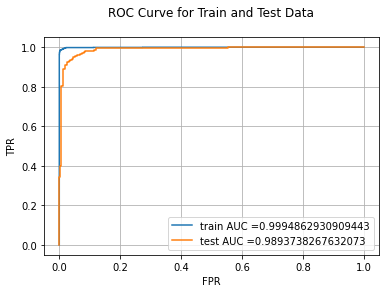

In [ ]:
plot_roc_curve(y_train, y_train_prob, y_val, y_val_prob)

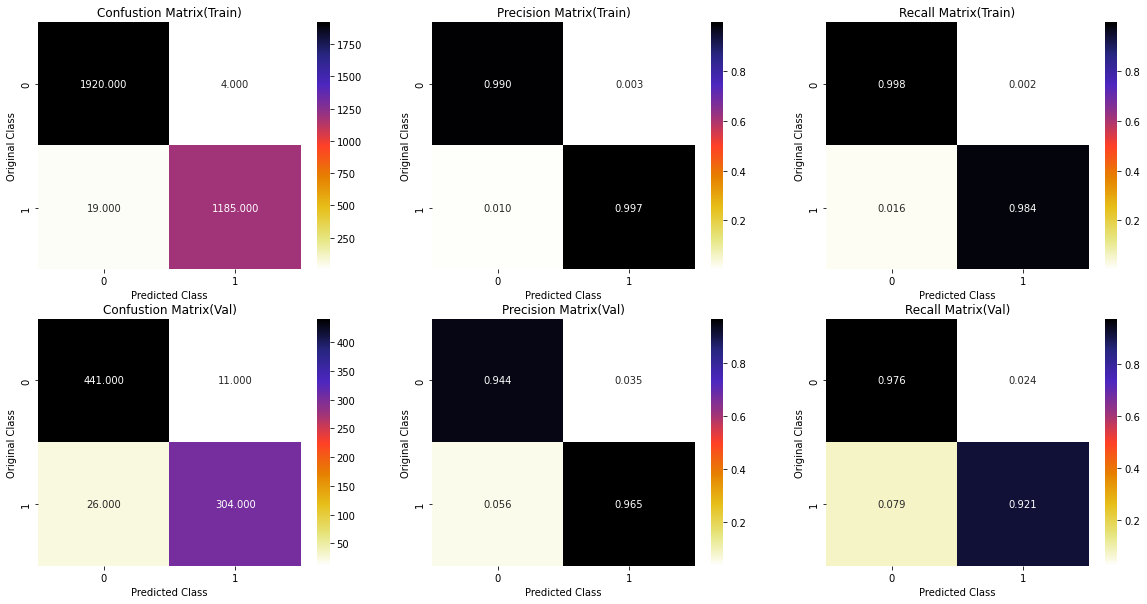

In [ ]:
plot_confusion_matrix(y_train, y_train_pred, y_val, y_val_pred)

##### Using Correation Matrix Features

In [ ]:
n_estimators = [5, 10, 50, 100, 200, 500,1000]
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]

from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
parameters = {'n_estimators' : n_estimators, 'max_depth' : max_depth }
est = xgb.sklearn.XGBClassifier(eval_metric= 'auc', objective='binary:logistic')
clf = RandomizedSearchCV(est, parameters, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1, return_train_score=True)
clf.fit(X_train1, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=XGBClassifier(eval_metric='auc'), n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [5, 10, 50, 100, 200,
                                                         500, 1000]},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
train_score = clf.cv_results_.get('mean_train_score')
test_score = clf.cv_results_.get('mean_test_score')
parameters = clf.cv_results_.get('params')
print('\t\tparameters\t\t', '   Train AUC\t\t', '   Test AUC\n')
for i in range(10):
    print(parameters[i],'\t',train_score[i],'\t', test_score[i])
    
print("\nThe best parameters are ", clf.best_params_)

		parameters		    Train AUC		    Test AUC

{'n_estimators': 5, 'max_depth': 8} 	 0.9801216575951793 	 0.9523600197067869
{'n_estimators': 100, 'max_depth': 9} 	 0.9998285848238987 	 0.9876210875144329
{'n_estimators': 5, 'max_depth': 3} 	 0.9505725880573705 	 0.9418556839700546
{'n_estimators': 100, 'max_depth': 2} 	 0.9895840311021528 	 0.9836530530448925
{'n_estimators': 10, 'max_depth': 2} 	 0.9527443372241954 	 0.9469509699996962
{'n_estimators': 200, 'max_depth': 5} 	 0.9995628138841273 	 0.9873656115472477
{'n_estimators': 5, 'max_depth': 10} 	 0.9847844676032255 	 0.9543136658065544
{'n_estimators': 1000, 'max_depth': 4} 	 0.9999441538323736 	 0.9863481824628203
{'n_estimators': 200, 'max_depth': 4} 	 0.9988630899381242 	 0.9872634041143802
{'n_estimators': 50, 'max_depth': 9} 	 0.9992450124746487 	 0.9860175381417026

The best parameters are  {'n_estimators': 100, 'max_depth': 9}


In [ ]:
clf1 = xgb.sklearn.XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1,  verbosity=1, objective='binary:logistic', n_jobs=-1)
clf1.fit(X_train1, y_train)

y_train_pred = clf1.predict(X_train1)
y_val_pred = clf1.predict(X_val1)
y_train_prob = clf1.predict_proba(X_train1)
y_val_prob = clf1.predict_proba(X_val1)

print_scores(y_train, y_train_pred, y_val, y_val_pred)

Pt.add_row(["Xgboost", "Correlation", 
            np.round(roc_auc_score(y_train, y_train_prob[:,1]),4), np.round(roc_auc_score(y_val, y_val_prob[:,1]),4), 
            np.round(accuracy_score(y_train, y_train_pred)*100,2),
            np.round(accuracy_score(y_val, y_val_pred)*100,2)])

print('='*50)

AUC for train data : 0.9997
AUC for validation data : 0.9893
Accuracy Value for train data : 99.55%
Accuracy Value for validation data : 95.14%


AUC for train data : 0.9997
AUC for validation data : 0.9893


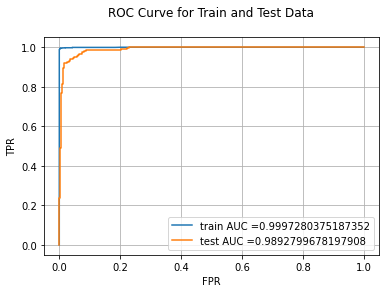

In [ ]:
plot_roc_curve(y_train, y_train_prob, y_val, y_val_prob)

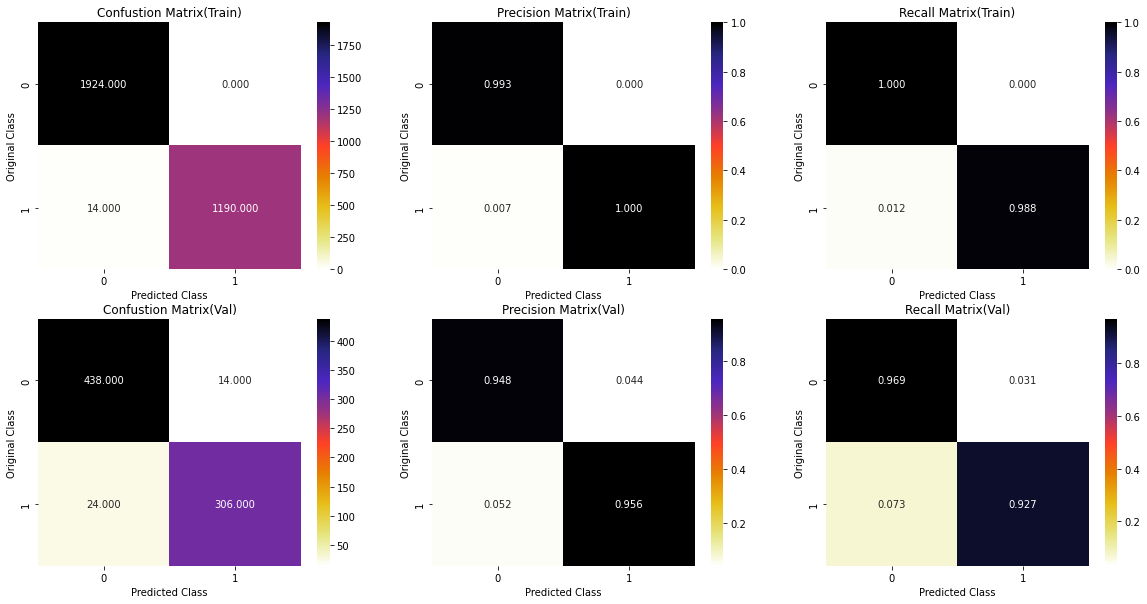

In [ ]:
plot_confusion_matrix(y_train, y_train_pred, y_val, y_val_pred)

##### Using Mutual Information Featues

In [ ]:
n_estimators = [5, 10, 50, 100, 200, 500,1000]
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]

from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
parameters = {'n_estimators' : n_estimators, 'max_depth' : max_depth }
est = xgb.sklearn.XGBClassifier(eval_metric= 'auc', objective='binary:logistic')
clf = RandomizedSearchCV(est, parameters, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1, return_train_score=True)
clf.fit(X_train2, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=XGBClassifier(eval_metric='auc'), n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [5, 10, 50, 100, 200,
                                                         500, 1000]},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
train_score = clf.cv_results_.get('mean_train_score')
test_score = clf.cv_results_.get('mean_test_score')
parameters = clf.cv_results_.get('params')
print('\t\tparameters\t\t', '   Train AUC\t\t', '   Test AUC\n')
for i in range(10):
    print(parameters[i],'\t',train_score[i],'\t', test_score[i])
    
print("\nThe best parameters are ", clf.best_params_)

		parameters		    Train AUC		    Test AUC

{'n_estimators': 1000, 'max_depth': 10} 	 0.9999982187550303 	 0.9857388655139387
{'n_estimators': 5, 'max_depth': 5} 	 0.9648172663856419 	 0.9467871634899434
{'n_estimators': 500, 'max_depth': 6} 	 0.9999977328303252 	 0.986396278212624
{'n_estimators': 10, 'max_depth': 2} 	 0.9532570646245816 	 0.9470337990413483
{'n_estimators': 1000, 'max_depth': 9} 	 0.9999982187550301 	 0.98574430873016
{'n_estimators': 200, 'max_depth': 2} 	 0.9935252684582844 	 0.9846055386882195
{'n_estimators': 1000, 'max_depth': 2} 	 0.9996671991667 	 0.9855975735838395
{'n_estimators': 10, 'max_depth': 8} 	 0.9877796835402233 	 0.96086808507444
{'n_estimators': 10, 'max_depth': 7} 	 0.985030943892811 	 0.9629533786717674
{'n_estimators': 5, 'max_depth': 2} 	 0.937533581115055 	 0.933778630812109

The best parameters are  {'n_estimators': 500, 'max_depth': 6}


In [ ]:
clf1 = xgb.sklearn.XGBClassifier(n_estimators=500, max_depth=6, learning_rate=0.1,  verbosity=1, objective='binary:logistic', n_jobs=-1)
clf1.fit(X_train2, y_train)

y_train_pred = clf1.predict(X_train2)
y_val_pred = clf1.predict(X_val2)
y_train_prob = clf1.predict_proba(X_train2)
y_val_prob = clf1.predict_proba(X_val2)

print_scores(y_train, y_train_pred, y_val, y_val_pred)

Pt.add_row(["Xgboost", "Mutual Information", 
            np.round(roc_auc_score(y_train, y_train_prob[:,1]),4), np.round(roc_auc_score(y_val, y_val_prob[:,1]),4), 
            np.round(accuracy_score(y_train, y_train_pred)*100,2),
            np.round(accuracy_score(y_val, y_val_pred)*100,2)])

print('='*50)

AUC for train data : 1.0
AUC for validation data : 0.9877
Accuracy Value for train data : 99.9%
Accuracy Value for validation data : 95.01%


AUC for train data : 1.0
AUC for validation data : 0.9877


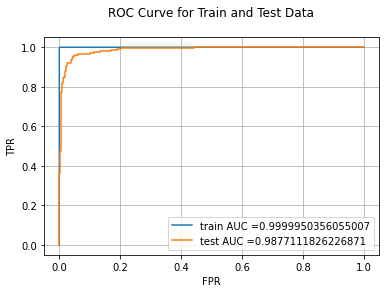

In [ ]:
plot_roc_curve(y_train, y_train_prob, y_val, y_val_prob)

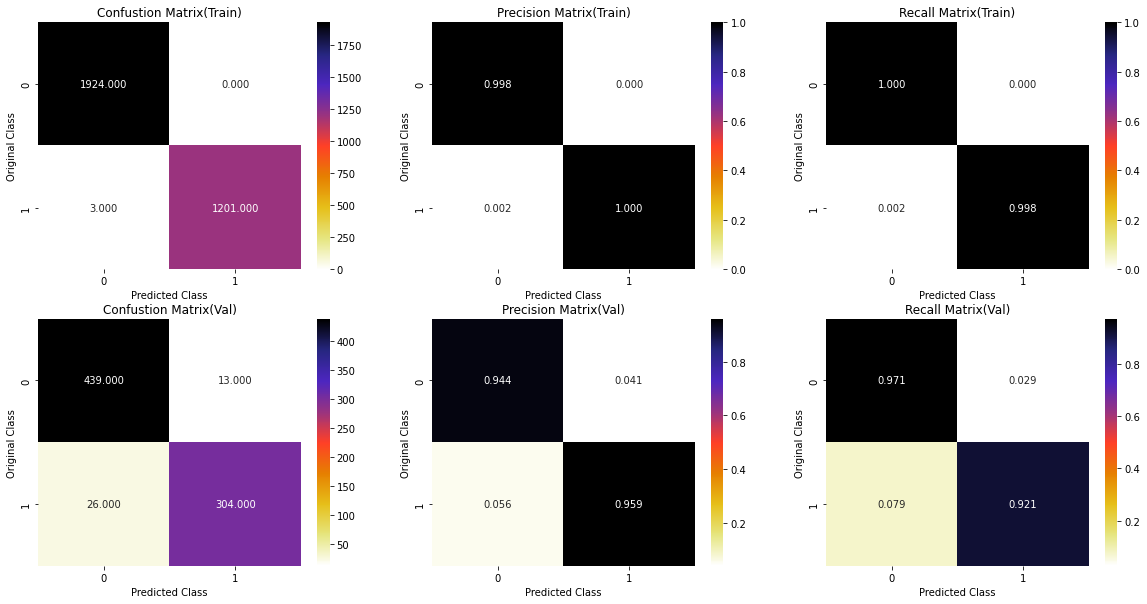

In [ ]:
plot_confusion_matrix(y_train, y_train_pred, y_val, y_val_pred)

##### Using Random Forest Features

In [ ]:
n_estimators = [5, 10, 50, 100, 200, 500,1000]
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]

from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
parameters = {'n_estimators' : n_estimators, 'max_depth' : max_depth }
est = xgb.sklearn.XGBClassifier(eval_metric= 'auc', objective='binary:logistic')
clf = RandomizedSearchCV(est, parameters, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1, return_train_score=True)
clf.fit(X_train3, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=XGBClassifier(eval_metric='auc'), n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [5, 10, 50, 100, 200,
                                                         500, 1000]},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
train_score = clf.cv_results_.get('mean_train_score')
test_score = clf.cv_results_.get('mean_test_score')
parameters = clf.cv_results_.get('params')
print('\t\tparameters\t\t', '   Train AUC\t\t', '   Test AUC\n')
for i in range(10):
    print(parameters[i],'\t',train_score[i],'\t', test_score[i])
    
print("\nThe best parameters are ", clf.best_params_)

		parameters		    Train AUC		    Test AUC

{'n_estimators': 10, 'max_depth': 2} 	 0.9532570646245816 	 0.9470337990413483
{'n_estimators': 100, 'max_depth': 7} 	 0.9996202950629266 	 0.9870569079883217
{'n_estimators': 10, 'max_depth': 10} 	 0.9916415718650334 	 0.9671283028869101
{'n_estimators': 50, 'max_depth': 9} 	 0.9993355316803365 	 0.9859843386274795
{'n_estimators': 200, 'max_depth': 8} 	 0.99997249258195 	 0.9873066453286622
{'n_estimators': 5, 'max_depth': 9} 	 0.982182463722773 	 0.9533376862680377
{'n_estimators': 100, 'max_depth': 9} 	 0.9998465739379304 	 0.9872811372386111
{'n_estimators': 500, 'max_depth': 4} 	 0.9999365603763671 	 0.9871677496509969
{'n_estimators': 500, 'max_depth': 10} 	 0.9999987046797352 	 0.9863623849198356
{'n_estimators': 50, 'max_depth': 5} 	 0.995561620594375 	 0.9847022234332728

The best parameters are  {'n_estimators': 200, 'max_depth': 8}


In [ ]:
clf1 = xgb.sklearn.XGBClassifier(n_estimators=200, max_depth=8, learning_rate=0.1,  verbosity=1, objective='binary:logistic', n_jobs=-1)
clf1.fit(X_train3, y_train)

y_train_pred = clf1.predict(X_train3)
y_val_pred = clf1.predict(X_val3)
y_train_prob = clf1.predict_proba(X_train3)
y_val_prob = clf1.predict_proba(X_val3)

print_scores(y_train, y_train_pred, y_val, y_val_pred)

Pt.add_row(["Xgboost", "Random Forest", 
            np.round(roc_auc_score(y_train, y_train_prob[:,1]),4), np.round(roc_auc_score(y_val, y_val_prob[:,1]),4), 
            np.round(accuracy_score(y_train, y_train_pred)*100,2),
            np.round(accuracy_score(y_val, y_val_pred)*100,2)])

print('='*50)

AUC for train data : 0.9999
AUC for validation data : 0.9895
Accuracy Value for train data : 99.84%
Accuracy Value for validation data : 95.14%


AUC for train data : 0.9999
AUC for validation data : 0.9895


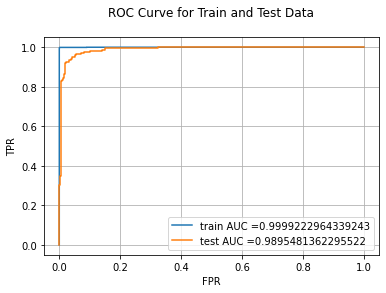

In [ ]:
plot_roc_curve(y_train, y_train_prob, y_val, y_val_prob)

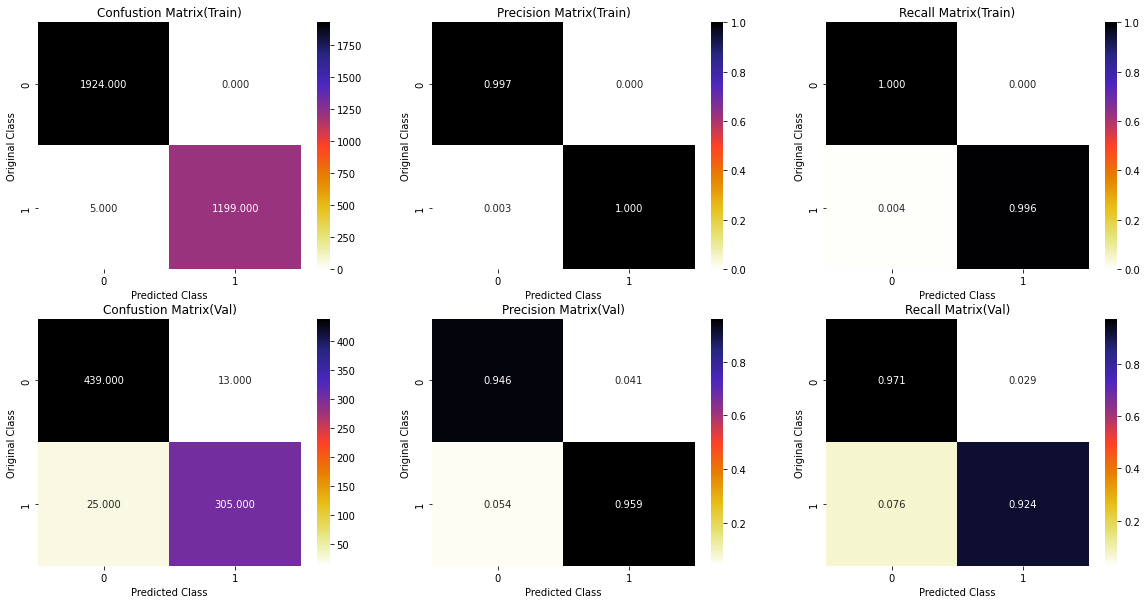

In [ ]:
plot_confusion_matrix(y_train, y_train_pred, y_val, y_val_pred)

### ANN

##### Using All features
Since Neural Network take Raw data and are able to do fearture engineering itself so we will use All Features

In [ ]:
def create_model(df):

  import keras
  from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
  from keras import models
  from keras.models import Sequential

  he = keras.initializers.HeNormal()
  model = Sequential()
  model.add(Dense(16, input_dim=df.shape[1], activation='relu'))
  model.add(Dense(8, activation='relu'))  
  model.add(Dense(1, activation='sigmoid'))
  # compile the keras model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
# fit the keras model on the dataset
model = create_model(X_train)
model.fit(X_train, y_train, epochs=32, verbose=0)

In [ ]:
y_train_prob = model.predict(X_train)
y_val_prob = model.predict(X_val)
y_train_pred = (y_train_prob > 0.5).astype(int)
y_val_pred = (y_val_prob > 0.5).astype(int)

In [ ]:
print_scores(y_train, y_train_pred, y_val, y_val_pred)

Pt.add_row(["ANN", "All Features", 
            np.round(roc_auc_score(y_train, y_train_prob),4), np.round(roc_auc_score(y_val, y_val_prob),4), 
            np.round(accuracy_score(y_train, y_train_pred)*100,2),
            np.round(accuracy_score(y_val, y_val_pred)*100,2)])

print('='*50)

Train AUC           : 0.9947
Validation AUC      : 0.9828
Train Accuracy      : 97.31%
Valdiation Accuracy : 94.88%


AUC for train data : 0.9947
AUC for validation data : 0.9828


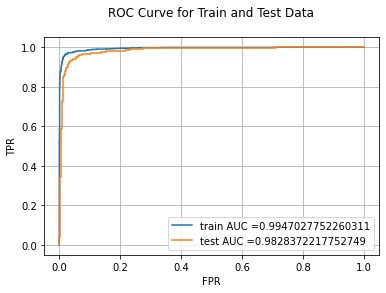

In [ ]:
plot_roc_curve(y_train, y_train_prob, y_val, y_val_prob)

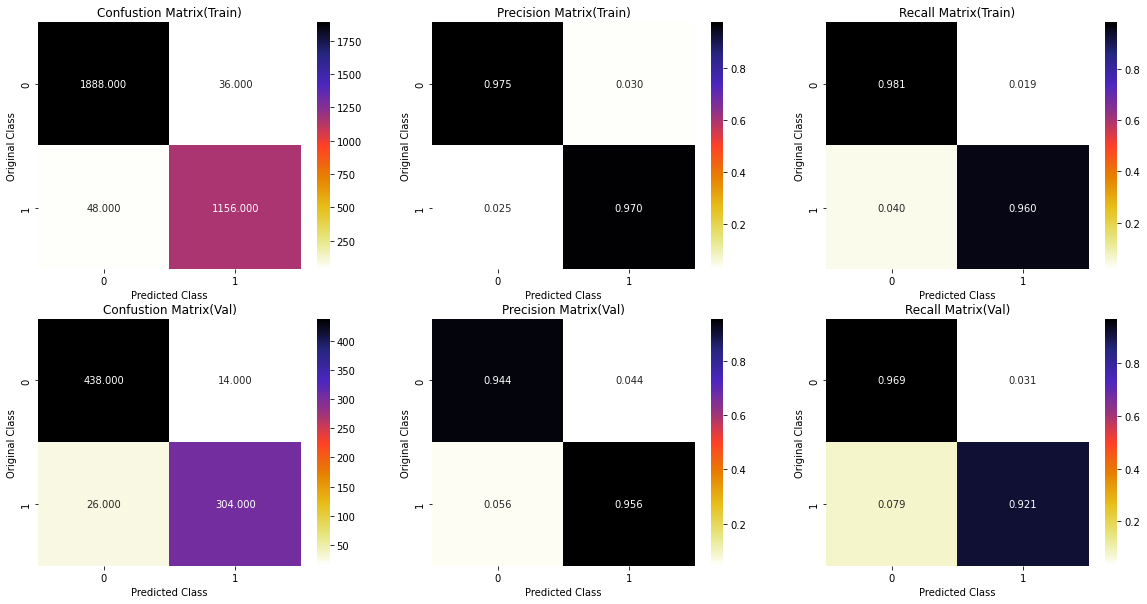

In [ ]:
plot_confusion_matrix(y_train, y_train_pred, y_val, y_val_pred)

## Conclusions

In [ ]:
print(Pt)

+---------------------+--------------------+-----------+---------+----------------+--------------+
|        Model        |        Data        | Train AUC | Val AUC | Train Accuracy | Val Accuracy |
+---------------------+--------------------+-----------+---------+----------------+--------------+
|         KNN         |    All Features    |   0.969   |  0.9616 |      90.6      |    89.13     |
|         KNN         |    Correlation     |   0.9713  |  0.9605 |     91.02      |    89.51     |
|         KNN         | Mutual Information |   0.9758  |  0.9588 |      91.4      |     89.0     |
|         KNN         |   Random Forest    |   0.9715  |  0.9583 |     91.08      |     89.0     |
| Logistic Regression |    All Features    |   0.9724  |  0.9745 |     92.55      |    92.71     |
| Logistic Regression |    Correlation     |   0.9727  |  0.9774 |     92.68      |    93.09     |
| Logistic Regression | Mutual Information |   0.9692  |  0.9718 |     91.78      |    92.71     |
| Logistic

**Conclusions:**

We are selecting those scores which are maximum and have less difference between the Train AUC and Validation AUC
*   Using Data Selection Method we generated four data for Modelling.
*   We used KNN, Logistic Regression, SVM, Xgboost and ANN Models.
*   All Feature Data perfrom good on KNN (0.969 AUC) as others are slightly getting overfit.
*   In Logistic Regression validation data are more compare to train. All Features Data perform good here too.
* All Features data peroming good on SVM, Xgboost and ANN too.

We are selecting Xgboost Model and All Features data for testing X_test


